[![](https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6)](http://cse.illinois.edu/)

# Scientific Python for Engineers

<a id='intro'></a>
## Scientific Computing

<img src="https://bytebucket.org/davis68/python/raw/4a0bfc6faee66e304c9eb04a69ccce2553f93348/lessons/img/science-cycle.png?token=a77e74de949e4f888fccd3268c175050cbc47b41" width="250" align = "left" />
In its purest sense, science describes both the simple hypothesize–test–revise method at its heart and the accrued body of knowledge obtained thereby:  sharp at the center, fuzzy at the edges.  Computation and modeling fits into this cycle by allowing models to be generated and tested against empirical natural results as well as in cases where no physical results are attainable.

Computational science and engineering is the related discipline, lying at the intersection of applied mathematics, computer science, and traditional science and engineering.  As a discipline, CSE uses high-performance computing (HPC), numerical algorithms, and physical insight to further engineering and scientific ends.

Although most scientific code is written in Fortran or C/C++, Python has rapidly become a serious and viable contender as a complete scientific computing language, particular in competition with MATLAB.  The packages discussed in this notebook, NumPy and SciPy, are the current enablers of that prowess.  As much of their underlying features take advantage of compiled C libraries, their performance is comparable to traditional compiled languages, yet they retain the dynamic flexibility of Python.

## Contents
- [Scientific Computing](#intro)
- [NumPy/SciPy](#numpyscipy)
- [Motivation 1](#motiv1)
- [Motivation 2](#motiv2)
- [Numerical Python](#numpy)
    - [Arrays & Data](#array)
    - [Views, Copies, & Slices](#views)
    - [File I/O with `ndarray`s](#fileio)
    - [Vectorization](#vector)
    - [Linear Algebra](#linalg)
    - [Polynomials](#poly)
    - [Random Sampling](#random)
- [Scientific Python](#scipy)
    - [Special Constants](#const)
    - [Integrals & Differential Equations](#intdiff)
    - [Data Interpolation](#interp)
    - [Optimization](#opt)
    - [Special Functions](#sepcfun)
    - [Statistics](#stat)
- [Integrated Examples](#int-ex)
    - [Finite Difference Heat Equation](#fdhe)
    - [Mandelbrot Set (Fractals & Complex Plane)](#mandel)
- [References](#refs)
- [Credits](#credits)

---
<a id='numpyscipy'></a>
## NumPy/SciPy

This notebook discusses the main features of [Numerical Python](http://www.numpy.org/) (`numpy`), [Scientific Python](http://www.scipy.org/) (`scipy`), and their relatives in an engineering context.

Although any installation of [IPython](http://ipython.org/) will work with a version of this notebook, we recommend that you download and install either the [Enthought Canopy Distribution](https://www.enthought.com/products/canopy/) (free for academic users) or [Anaconda](https://continuum.io/downloads).  To launch the notebook, open a command terminal, type `ipython notebook tutorial.ipynb`, and press Return.

A few notes on this tutorial:

- The code in this tutorial is written for Python 3, so if you have Python 2 then you will need to make some sensible modifications.

- Code blocks starting with `$` are intended to be run on the command line, not executed as Python code.

#### Standard Header

As we will be utilizing a number of packages with reasonably long names, we will adopt the _de facto_ standard module abbreviations in the following header.  We also ensure that our [division behavior is sensible](http://www.python.org/dev/peps/pep-0238/) by importing from `__future__`:  _i.e._, promotion to `double` will occur from `int` or `long` data types involving division:  `1/2 == 0.5`.  Although this is the default in Python 3, it is a trivial way to help this notebook work in Python 2 if that's what you are using.

In [2]:
from __future__ import division, print_function

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

#IPython magic command for inline plotting
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[8,6]

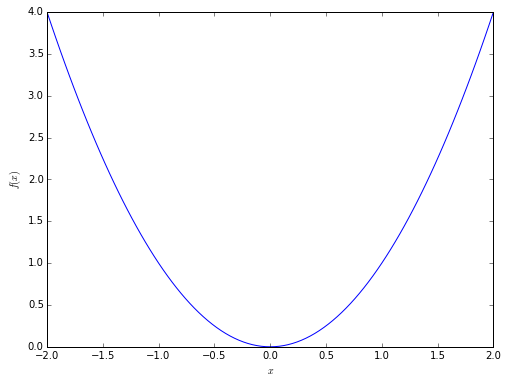

In [3]:
x = np.linspace(-2,2,101)
y = x**2
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(x,y)
plt.show()

In [4]:
2.718281828**2 -(1+2+2**2/2+2**3/6+2**4/24+2**5/120+2**6/720+2**7/(7*720)+ 2**8/(7*8*720))

0.0017545091334341123

#### Getting Help

In [4]:
from scipy import optimize
help(optimize.fmin)

Help on function fmin in module scipy.optimize.optimize:

fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None)
    Minimize a function using the downhill simplex algorithm.
    
    This algorithm only uses function values, not derivatives or second
    derivatives.
    
    Parameters
    ----------
    func : callable func(x,*args)
        The objective function to be minimized.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to func, i.e. ``f(x,*args)``.
    callback : callable, optional
        Called after each iteration, as callback(xk), where xk is the
        current parameter vector.
    xtol : float, optional
        Relative error in xopt acceptable for convergence.
    ftol : number, optional
        Relative error in func(xopt) acceptable for convergence.
    maxiter : int, optional
        Maximum number of iterations to perform.
    maxfun : number, o

---
<a id='motiv1'></a>
## Motivation 1:  Working with Arrays

<img src="https://bytebucket.org/davis68/python/raw/d63c3c3a7a6406dd4d701707981bf33a88ecf019/lessons/img/y_fall.png?token=7252c67b7d14bcbbb84cf591886f31a9bf4f48d4" align = "left" />
As a partial motivation for our discussion of NumPy, let us briefly consider the problem of an object moving under the influence of a gravitational force field.

This problem will obey the standard law for an object subject to gravitational acceleration,
$$y(t) = g t^{2} + v_{0}(t) t + x_0 \,\text{.}$$

We take the object to be initially stationary and falling from an initial position $x_{0} = 1000 \,\text{m}$.

##### For a single point

In [5]:
# This code snippet models a falling object using the well-known formula.
a  = -9.8 #m/s^2
v  = 0    #m/s
x0 = 1000 #m
t = 1

y = a*t**2 + v*t + x0
print(y)

990.2


Python has a simple syntax which allows you to express mathematical and numerical expressions succinctly.  Its syntax was in part inspired by MATLAB's, although making some distinct changes and improvements.

- For MATLAB users:  what is different in the line `y = a*t**2 + v*t + x0` from what you would typically expect?

##### For a list

Often, however, we don't just want to evaluate a function like this at one point, but at an array of points:  for instance, time steps.  The intuitive way to do this in Python is to try using a `list`.  So take the code snippet above and try to use it on a `list` of numbers:

In [6]:
# This code snippet models a falling object using the well-known formula.
a  = -9.8 #m/s^2
v  = 0    #m/s
x0 = 1000 #m
t = [0.0, 0.25, 0.5, 0.75, 1.0]

#y = a*t**2 + v*t + x0
y = [a*ti**2 + v*ti + x0 for ti in t]
print(y)

[1000.0, 999.3875, 997.55, 994.4875, 990.2]


##### For an array

Basic pure Python cannot go beyond this point trivially:  you have to introduce loops or some more advanced logic to get this to work properly with lists.  A better way is NumPy.

The NumPy solution to this problem introduces the `array` object (more pedantically, the `ndarray` object).  This object has common mathematical operators overloaded to work properly with it out-of-the-box; thus,

In [7]:
# This code snippet models a falling object using the well-known formula.
a  = -9.8 #m/s^2
v  = 0    #m/s
x0 = 1000 #m
t = np.array([0.0, 0.25, 0.5, 0.75, 1.0])

y = a*t**2 + v*t + x0
print(y)

[ 1000.       999.3875   997.55     994.4875   990.2   ]


##### As a function

You can generalize this calculation a little bit more by abstracting it out into a function.

Many features of `array`-based calculations will work as you would intuitively expect in your functions, although sometimes you need to tweak things to make them work correctly.  A set of powerful methods in the SciPy library (including NumPy, SciPy, MatPlotLib, and others) allows you to _vectorize_ this function and make it apply to sets of numbers.

In [9]:
def y_fall(t, x0, v0):
    a = -9.8
    y = a*t**2 + v0*t + x0
    return y

t = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
y_fall(t, x0, v)

array([ 1000.    ,   999.3875,   997.55  ,   994.4875,   990.2   ])

Now we can trivially utilize NumPy functions, like `arange`, to calculate our result vector.

In [10]:
t = np.arange(0,10,0.1)
y = y_fall(t, x0, v)

print(y)

[ 1000.      999.902   999.608   999.118   998.432   997.55    996.472
   995.198   993.728   992.062   990.2     988.142   985.888   983.438
   980.792   977.95    974.912   971.678   968.248   964.622   960.8
   956.782   952.568   948.158   943.552   938.75    933.752   928.558
   923.168   917.582   911.8     905.822   899.648   893.278   886.712
   879.95    872.992   865.838   858.488   850.942   843.2     835.262
   827.128   818.798   810.272   801.55    792.632   783.518   774.208
   764.702   755.      745.102   735.008   724.718   714.232   703.55
   692.672   681.598   670.328   658.862   647.2     635.342   623.288
   611.038   598.592   585.95    573.112   560.078   546.848   533.422
   519.8     505.982   491.968   477.758   463.352   448.75    433.952
   418.958   403.768   388.382   372.8     357.022   341.048   324.878
   308.512   291.95    275.192   258.238   241.088   223.742   206.2
   188.462   170.528   152.398   134.072   115.55     96.832    77.918
    58.808 

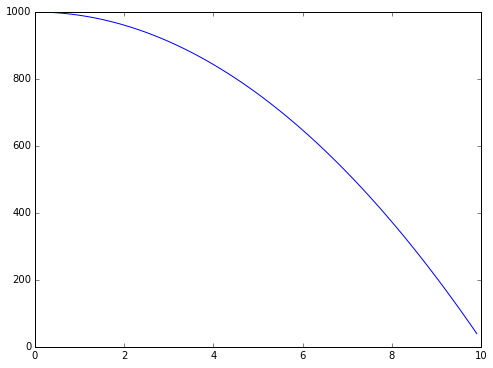

In [11]:
plt.plot(t, y_fall(t, x0, v))
plt.show()

Further improvements could be made in the function and the physical model.  However, this suffices to make our basic case:  NumPy and SciPy greatly extend the power of Python to investigate numerical and physical models.  This notebook will examine some of the features and their applications.

---
<a id='motiv2'></a>
## Motivation 2:  Speed

Consider a code solving the Laplace equation $\nabla^2 u = 0$ over a square grid ([source](http://technicaldiscovery.blogspot.com/2011/06/speeding-up-python-numpy-cython-and.html)).  The pure Python version follows:

In [12]:
from numpy import zeros

dx = 0.1
dy = 0.1
dx2 = dx*dx
dy2 = dy*dy

def py_update(u):
    nx, ny = u.shape
    for i in range(1,nx-1):
        for j in range(1, ny-1):
            u[i,j] = ((u[i+1, j] + u[i-1, j]) * dy2 +
                      (u[i, j+1] + u[i, j-1]) * dx2) / (2*(dx2+dy2))

def calc(N, Niter=100, func=py_update, args=()):
    u = zeros([N, N])
    u[0] = 1
    for i in range(Niter):
        func(u,*args)
    return u

This code takes a _long_ time (if you don't want to wait, go to Kernel->Interrupt in the menu above).  About *** on my machine.

In [20]:
%timeit calc(100, 200, func=py_update)

1 loops, best of 3: 4.13 s per loop


Let's compare a NumPy version.

In [13]:
def num_update(u):
    u[1:-1,1:-1] = ((u[2:,1:-1]+u[:-2,1:-1])*dy2 + 
                    (u[1:-1,2:] + u[1:-1,:-2])*dx2) / (2*(dx2+dy2))

In [17]:
%timeit calc(100, 200, func=num_update)
out = calc(100, 200, func=num_update); out

10 loops, best of 3: 27 ms per loop


array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   4.96840567e-01,   6.91349541e-01, ...,
          6.91349541e-01,   4.96840567e-01,   0.00000000e+00],
       [  0.00000000e+00,   2.96075292e-01,   4.87486783e-01, ...,
          4.87486783e-01,   2.96075292e-01,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   4.05603746e-24,   8.06542032e-24, ...,
          8.06542032e-24,   4.05603746e-24,   0.00000000e+00],
       [  0.00000000e+00,   1.25142977e-24,   2.48413442e-24, ...,
          2.48413442e-24,   1.25142977e-24,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

So (on my machine) that's (6.18 s)/(21.9 ms) = 282$\times$ speedup!  (You can do even better moving to more optimized code, but we'll ignore that for now.)  The point is that for any serious numerical work, NumPy is the package to build on.

(By the by, you can also do better if you include C code directly, for instance using the `scipy.weave` package which we won't discuss further.  In this particular case, it's not much better.  We will also discuss the incorporation of C and Fortran code and libraries into Python in a few lessons.)

---
<a id='numpy'></a>
## Numerical Python

NumPy is the foundational numerical module in modern Python (both 2 and 3).  NumPy provides the basic array manipulation and mathematical routines that are drawn upon by scientific classes.  The common classes (which will discuss here) are either built directly on NumPy (SciPy, Pandas, MatPlotLib) or can readily interface with it (`mpmath`).

![](./img/numpy.png)

NumPy is implemented in combination of Python and C so it executes [much faster](http://wiki.scipy.org/PerformancePython) than the corresponding pure Python code would.  In particular, for array-based problems, NumPy provides vastly improved performance, comparable to [MATLAB](http://www.mathworks.com/).  NumPy provides the following key features which we will touch on in this notebook:

- a powerful generic $N$-dimensional array object

- vectorized functions

- useful linear algebra, Fourier transform, and random number capabilities (these are greatly extended by SciPy)

NumPy also contains tools for integrating C/C++ and Fortran code with Python for numerical applications, although this falls beyond the scope of this tutorial.

<a id='array'></a>
## Arrays & Data

Let us suppose that we have a collection of commodity pricing data in the file `../data/price-data.csv`.  Let's examine the plain-text contents of this file first.

In [23]:
!cat ../data/price-data.csv

First, we need to import the data into this notebook (into Python) so we can manipulate it.

In [28]:
data = np.loadtxt("../data/price-data.csv", delimiter=",", skiprows=1)

Now we can explore a few questions by analyzing the data set directly.

-   What is the size and shape of this data set?

In [29]:
data.shape

(100, 5)

-   How many time periods are available in this data set?

In [31]:
len(data)

100

-   What is the average price of each commodity?

In [32]:
np.mean(data[:,1]), np.mean(data[:, 3])

(0.99315090607199996, 0.9863018121399999)

-   How would we have to answer the same question using `list`s?

In [55]:
sum(x for x in data[:, 1])/len(data[:, 1]), sum(x for x in data[:, 3])/len(data[:, 3]), 

(0.99315090607200007, 0.9863018121399999)

-   In how many time periods is the price of commodity 1 greater than the price of commodity 2?

In [37]:
len(np.where(data[:,1] > data[:,3])[0])

57

-   Let revenue for a commodity equal price times demand.  Calculate the revenue from each commodity for each time period, the total revenue from each commodity over all time periods, and the overall total revenue.  Calculate the standard deviation for the total revenue from each commodity and the overall total revenue.

In [51]:
revenue1 = data[:, 1]*data[:, 2]; print("Total Revenue 1 = {:.0f} +/- {:.2f}".format(np.sum(revenue1), np.std(revenue1)))
revenue2 = data[:, 3]*data[:, 4]; print("Total Revenue 2 = {:.0f} +/- {:.2f}".format(np.sum(revenue2), np.std(revenue2)))
print("Total Revenue = {:.0f} +/- {:.2f}"
      .format(np.sum(np.hstack((revenue1, revenue2))), np.std(np.hstack((revenue1, revenue2)))))

Total Revenue 1 =199 +/- 0.43
Total Revenue 2 =208 +/- 0.98
Total Revenue = 407 +/- 0.76


-   What do we learn about commodity behavior from these results?

-   Although not the focus of this workshop, plot the commodity data against time period.

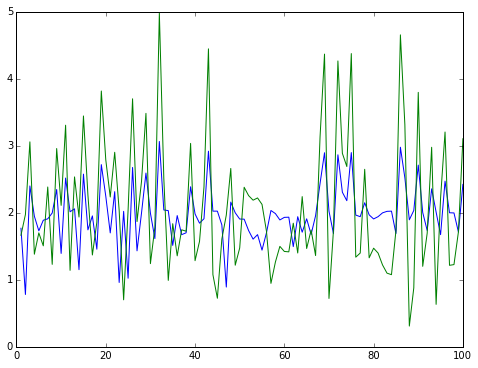

In [53]:
plt.plot(data[:, 0], revenue1)
plt.plot(data[:, 0], revenue2)
plt.show()

#### Arrays

With that exercise in hand, let's examine the underlying properties of `numpy`.

The core data type of `numpy` is the [`ndarray`](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html), or colloquially the _array_.  Arrays are row-major multidimensional containers of items of the same size and type.  Or, more intuitively, think of them as lists which can act as mathematical vectors and matrices without any trouble.

In [56]:
A = np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


You can make them directly from a list, as above, or you can use one of the built-in helper functions to do it.

For instance, `numpy.ones` takes the _dimensions_ of the desired array, as either a list or a tuple.

In [57]:
B = np.ones([3,2])
print(B)

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


In [58]:
C = np.zeros((4,5))
print(C)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [59]:
I = np.eye(3)
print(I)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


These arrays now behave "properly"—that is, it's a little harder to run into a mathematical operation that doesn't just work as you may expect.

In [60]:
A + 1

array([[2, 3],
       [4, 5]])

In [61]:
# elementwise multiplication
B * B

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [62]:
# matrix multiplication
B.dot(A)

array([[ 4.,  6.],
       [ 4.,  6.],
       [ 4.,  6.]])

In [63]:
B - 3

array([[-2., -2.],
       [-2., -2.],
       [-2., -2.]])

In [64]:
B - 0+3j

array([[ 1.+3.j,  1.+3.j],
       [ 1.+3.j,  1.+3.j],
       [ 1.+3.j,  1.+3.j]])

Naturally, additions or multiplications for arrays of different shapes do not work.

In [65]:
A + B

ValueError: operands could not be broadcast together with shapes (2,2) (3,2) 

In [66]:
A.dot(B)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

As you can see, values promote to the expected data type, although the default is double `float64`.  If you need to, you may also specify the desired variable type according to [those available in NumPy](http://docs.scipy.org/doc/numpy/reference/arrays.scalars.html#built-in-scalar-types) (notable examples include double `float64`, complex double `complex128`, quad `float128`, and long `int64`).  These reflect the data types available in the underlying C implementation of the numerical code.

In [67]:
# Initialize array elements to one.
np.ones((3,2), dtype=np.int32)

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

In [68]:
# Initialize array elements to zero.
np.zeros((6,1),dtype=np.complex)

array([[ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j]])

In [69]:
# Do not initialize array elements to any particular values---use with caution!
np.empty((4,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

#### Ranges

Numerical calculations often require sequential arrays for coordinates.  These can be nontrivial to create without a loop in pure Python, but naturally NumPy supports a way—actually two—to create coordinate arrays or ranges trivially.

##### `arange`

[`arange`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) is the floating-point counterpart to `range`.  `range` only returns integers and fails on floating-point arguments.  `arange` returns an array of evenly-spaced floating-point values.

**Python 2 v. 3**:  In Python 2, `range` generates a `list` of values.  In Python 3, `range` returns an iterable instead (equivalent to Python 2's `xrange`).  If you're not sure of the difference yet, the behavior should still be as you generally expect.

In [70]:
print('range with integers: ', [i for i in range(10)])
print('range with integers: ', [i for i in range(0,10,2)])

range with integers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
range with integers:  [0, 2, 4, 6, 8]


In [71]:
print('range with floats: ',   [i for i in range(0,10,0.5)])

TypeError: 'float' object cannot be interpreted as an integer

In [73]:
print('arange with integers: ', np.arange(10))
print('arange with integers: ', np.arange(0,10,2))
print('arange with floats: ',   np.arange(0,10,0.5))

arange with integers:  [0 1 2 3 4 5 6 7 8 9]
arange with integers:  [0 2 4 6 8]
arange with floats:  [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]


In [74]:
# Create a range of floating-point values (useful in for loops).
dx = 0.1
xhi = 2.0
xlo = 1.0
x = np.arange(xlo, xhi+dx, dx)
print(x)

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


##### `linspace`

Another option you have to create ranges is [`linspace`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), which is familiar to MATLAB users.

In [75]:
# Create an array with 11 equal spaces from 0 to 1 inclusive.
np.linspace(0, 1, 11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

**Careful!**  `linspace` is actually preferred for most cases, since numerical drift (discussed in a moment) leads `arange` to accrue small numerical truncation errors when using non-integer steps.  `np.linspace` is often a better choice, if less conveniently expressed.

Some other functions you should investigate for creating useful ranges are [`r_`](http://wiki.scipy.org/Numpy_Example_List#r_), [`c_`](http://wiki.scipy.org/Numpy_Example_List#c_), and [`item`](http://wiki.scipy.org/Numpy_Example_List#item).

#### Exercises

Use these cells to familiarize yourself with both IPython notebooks and NumPy/SciPy code.

- Create a $5\times5$ identity matrix.

In [76]:
np.eye(5,5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

- Create a range from -1.7 to 3.4 with 100 intervals using `linspace`.  Then do it using `arange`.

In [19]:
l_range = np.linspace(-1.7, 3.4, 100)
a_range = np.arange(-1.7, 3.4+(3.4+1.7)/100, (3.4+1.7)/100)

l_range == a_range

False

* Create an array `x` with the numbers $0, 0.5, 1.0$.
* Create an array `y` with the numbers $-5.3, -1.8, 1.5$.
* Place `x` and `y` into an array as two subsequent rows of data.  (We haven't talked about this yet—try a few things to see what works.)
* Output the result using `print`.  _Hint:  remember to enclose the variable names in a list._

In [84]:
x = np.linspace(0, 1.0, 3)
y = np.array([-5.3, -1.8, 1.5])
print(np.array([x, y]))

[[ 0.   0.5  1. ]
 [-5.3 -1.8  1.5]]


- Remember our earlier example with a falling object?  Now we want you to use the documentation to find out how the [`max`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html#numpy.amax) and [`argmax`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html#numpy.argmax) methods work.  Modify the last line of the following code to find the maximum height attained by the object and the corresponding time.  (Hint:  you need to get the index.)

In [88]:
def y_fall(t, x0, v0):
    a = -9.8
    y = a*t**2 + v0*t + x0
    maxy = np.max(y)
    maxt = t[np.argmax(y)]
    return maxt, maxy

t = np.arange(0,300,0.1)
print(y_fall(t, x0, v))

(0.0, 1000.0)


<a id='views'></a>
### Views, Copies, & Slices

<img src="https://bytebucket.org/davis68/python/raw/910519d8809fd712401fc593dda48f3f01586e8e/lessons/img/assignment-simple-variable.png?token=c2df0fbc708ee7e4af121c17c6caa0ccabe32624" width="150" align = "right" />
When working with an array, we can distinguish between when we want to refer to the same array (or parts of it) by _different names_, or when we want to actually work with copies of data.

With base data types, simple assignment makes a copy ($y$ doesn't change when $x$ changes).

In [89]:
x = 7
y = x
x = 8
print(x,y)

8 7


However, with arrays (particularly large ones), we don't want to incautiously make copies which could rapidly consume our available memory.  Thus the behavior for assignment in NumPy is to _not copy an array, but refer to it_.

#### Simple assignment (no copy)

<img src="https://bytebucket.org/davis68/python/raw/7979ec8389b25e308a00f1c12bc4b5235ca921bf/lessons/img/assignment-simple-numpy.png?token=8c05db8b5f2abe3516bcf819e52727201c3a1c51" width="400" align = "right" />
The variable names simply refer to the same object and the same data.  Any change made to one happens identically to the other.  This is the default behavior for NumPy assignment.

In [90]:
A = np.linspace(0.0, 9.0, 10)
B = A

print("A is B?", A is B)

A is B? True


In [91]:
A = np.linspace(0.0, 9.0, 10)
B = A

print("A =", A)
B[0] = -1 #changes element in A since B is simply another name for A
print("A =", A)

A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
A = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [92]:
B.shape = 2,5

print("A.shape =", A.shape)
print("A =", A)

print("B.shape =", B.shape)
print("B =", B)

A.shape = (2, 5)
A = [[-1.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]
B.shape = (2, 5)
B = [[-1.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


#### View (shallow copy)

<img src="https://bytebucket.org/davis68/python/raw/7979ec8389b25e308a00f1c12bc4b5235ca921bf/lessons/img/assignment-shallow.png?token=11bd2d7c8d7fa0b13af021f4efae76d883b1af51" width="400" align = "right" />
[_Views_](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.view.html) are ways of conveniently referring to the same data (perhaps a given row or column) by different variable names.  They are constructed using _slicing_ or the `view` method.

Views particularly find a good usage in referring to slices, such as ghost cells, which require regular access but are inconveniently addressed by a complex slicing expression.

In [93]:
A = np.linspace(0.0, 9.0, 10)
C = A.view()

print("C is A?", C is A)
print("C.base is A?", C.base is A)

C is A? False
C.base is A? True


In [94]:
A = np.linspace(0.0, 9.0, 10)
C = A.view()

print("A =", A)
C[0] = -1 #changes element in A since C shares the same data as A
print("A =", A)

A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
A = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [95]:
C.shape = 2,5

print("A.shape =", A.shape)
print("A =", A)

print("C.shape =", C.shape)
print("C =", C)

A.shape = (10,)
A = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
C.shape = (2, 5)
C = [[-1.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [96]:
D = C[1].view()
print(D)

[ 5.  6.  7.  8.  9.]


#### Copy (deep copy)

<img src="https://bytebucket.org/davis68/python/raw/b1ae595815788c6ab4c2ae2a89df2d64c5081d63/lessons/img/assignment-deep.png?token=283af08bc8e38230f332afd9598bea4e325c6310" width="400" align = "right" />
The `copy` method completely replicates the object and data of the array, creating an independent instance of all data.  This operation can be relatively slow and memory-intensive and should sometimes be avoided if possible.

In [97]:
A = np.linspace(0.0, 9.0, 10)
E = A.copy()

print("A is E?", A is E)
print("E.base is A?", E.base is A)

A is E? False
E.base is A? False


In [99]:
A = np.linspace(0.0, 9.0, 10)
E = A.copy()

print("A =", A)
E[0] = -1 #doesn't changes element in A since E is now a different instance from A
print("A =", A)
print("E =", E)

A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
E = [-1.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [100]:
E.shape = 2,5
print("A.shape =", A.shape)
print("A =", A)
print("E.shape =", E.shape)
print("E =", E)

A.shape = (10,)
A = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
E.shape = (2, 5)
E = [[-1.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


#### Slicing

NumPy slicing simply extends the traditional Python concept to $n$ dimensions.  Slices are views of the original array, and so are useful for manipulating or iterating over subsets.  The basic format for each dimension is _start_:_stop_:_step_.  Any or all of these may be omitted.

In [101]:
x = np.linspace(0, 9, 10)
print("x =", x)
print("x[0:5] =", x[0:5])
print("x[0:10:3] =", x[0:10:3])
print("x[1::2] =", x[1::2])
print("x[::] =", x[::])
print("x[::-1] =", x[::-1])

x = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
x[0:5] = [ 0.  1.  2.  3.  4.]
x[0:10:3] = [ 0.  3.  6.  9.]
x[1::2] = [ 1.  3.  5.  7.  9.]
x[::] = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
x[::-1] = [ 9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


In [37]:
import numpy.random as npr

X = npr.random((3,3))
print("X =\n", X)

X =
 [[ 0.90000894  0.04567141  0.61404652]
 [ 0.57270213  0.27238523  0.76057482]
 [ 0.12105458  0.72390562  0.75416844]]


In [103]:
print("X[0:2, 0] =", X[0:2, 0])
print("X[1::2] =", X[1::2])
print("X[:, 0] =", X[:, 0])
print("X[1, :] =", X[1, :])
print("X[::-1, ::-1] =\n", X[::-1, ::-1])

X[0:2, 0] = [ 0.90479721  0.85090833]
X[1::2] = [[ 0.85090833  0.4744872   0.36545109]]
X[:, 0] = [ 0.90479721  0.85090833  0.54505799]
X[1, :] = [ 0.85090833  0.4744872   0.36545109]
X[::-1, ::-1] =
 [[ 0.31761229  0.29984214  0.54505799]
 [ 0.36545109  0.4744872   0.85090833]
 [ 0.09762817  0.89074626  0.90479721]]


#### Exercises
- Create a $4 \times 4$ matrix $A$ consisting of all ones.  Take a slice of the first column in a variable called `A_col`.  Change the contents of this slice to twos.
- Now make a slice of the second row called `A_row` and change its contents to threes.

In [34]:
A = np.ones((4, 4))
A_col = A[:, 0]*2
A_row = A[0]*3
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

#### Sorting

Sorting by a nested element in a list of lists is rather complicated, requiring the definition of a sorting function for `sorted`, for instance.  NumPy provides a trivial solution:

In [35]:
A = np.array([[1.5,0.9,4.6,0.1],[0.3,0.8,1.3, 2.7],[2.5,2.5,0.6,3.2]])

print('A = \n', A, '\n')

# np.sort sorts everything in its column or row.
print('Sorted along first index:\n', np.sort(A, 0), '\n')
print('Sorted along second index:\n', np.sort(A, 1), '\n')

# To keep things together, try this:
print('Indices of sorting:\n', np.argsort(A))
print('yielding the matrix columns sorted by the first row:\n', np.take(A, np.argsort(A), 1)[:,0])
print('or the rows sorted by the first column:\n', np.take(A, np.argsort(A, 0), 0)[:,0])

A = 
 [[ 1.5  0.9  4.6  0.1]
 [ 0.3  0.8  1.3  2.7]
 [ 2.5  2.5  0.6  3.2]] 

Sorted along first index:
 [[ 0.3  0.8  0.6  0.1]
 [ 1.5  0.9  1.3  2.7]
 [ 2.5  2.5  4.6  3.2]] 

Sorted along second index:
 [[ 0.1  0.9  1.5  4.6]
 [ 0.3  0.8  1.3  2.7]
 [ 0.6  2.5  2.5  3.2]] 

Indices of sorting:
 [[3 1 0 2]
 [0 1 2 3]
 [2 0 1 3]]
yielding the matrix columns sorted by the first row:
 [[ 0.1  0.9  1.5  4.6]
 [ 2.7  0.8  0.3  1.3]
 [ 3.2  2.5  2.5  0.6]]
or the rows sorted by the first column:
 [[ 0.3  0.8  1.3  2.7]
 [ 1.5  0.9  4.6  0.1]
 [ 2.5  2.5  0.6  3.2]]


---
<a id='fileio'></a>
### File I/O with `ndarray`s

NumPy arrays can be written to disk in either a plain-text or binary format for future use.  This is especially convenient for crash recovery (interim matrices can be recovered) and result storage.

The [`save`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) function creates a binary `.npy` file containing the array.  This file may be loaded again using [`load`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html).

In [38]:
Q = npr.random((10,10))

print('Q = \n', Q)
np.save('random-data.npy', Q)

R = np.load('random-data.npy')
print('R = \n', R)

Q = 
 [[ 0.17403988  0.35381544  0.55628669  0.17459494  0.59486176  0.71390618
   0.78386485  0.40315248  0.90189918  0.8115401 ]
 [ 0.38560811  0.5283007   0.09898335  0.86761228  0.45280344  0.40883292
   0.00584867  0.16467714  0.64450918  0.73282249]
 [ 0.60058876  0.07516976  0.11839042  0.80928766  0.8501881   0.85945979
   0.53103088  0.533782    0.75929494  0.44592602]
 [ 0.65384589  0.13536747  0.26296633  0.48052236  0.85121538  0.33630902
   0.0705779   0.50003476  0.04205489  0.53781324]
 [ 0.40021068  0.33668708  0.86543371  0.3021784   0.82917614  0.42937143
   0.53694284  0.68198455  0.55388431  0.44975129]
 [ 0.58854314  0.96031587  0.18302616  0.48672136  0.95435364  0.69581266
   0.25424273  0.51511037  0.57560198  0.08275852]
 [ 0.69700438  0.46121779  0.12733496  0.44629545  0.79928469  0.31875635
   0.40316154  0.11889108  0.52726918  0.84384754]
 [ 0.99526171  0.0133942   0.3299506   0.57496494  0.07387982  0.48812799
   0.97140551  0.9295385   0.19162417  0.2273

The `savetxt` function creates a text file (of user-specified extension) containing the array.  This file may be loaded using `loadtxt` or the more robust `genfromtxt` (which handles missing values).

In [39]:
np.savetxt('random-data.dat', Q)

S = np.genfromtxt('random-data.dat')
print('S = \n', S)

S = 
 [[ 0.17403988  0.35381544  0.55628669  0.17459494  0.59486176  0.71390618
   0.78386485  0.40315248  0.90189918  0.8115401 ]
 [ 0.38560811  0.5283007   0.09898335  0.86761228  0.45280344  0.40883292
   0.00584867  0.16467714  0.64450918  0.73282249]
 [ 0.60058876  0.07516976  0.11839042  0.80928766  0.8501881   0.85945979
   0.53103088  0.533782    0.75929494  0.44592602]
 [ 0.65384589  0.13536747  0.26296633  0.48052236  0.85121538  0.33630902
   0.0705779   0.50003476  0.04205489  0.53781324]
 [ 0.40021068  0.33668708  0.86543371  0.3021784   0.82917614  0.42937143
   0.53694284  0.68198455  0.55388431  0.44975129]
 [ 0.58854314  0.96031587  0.18302616  0.48672136  0.95435364  0.69581266
   0.25424273  0.51511037  0.57560198  0.08275852]
 [ 0.69700438  0.46121779  0.12733496  0.44629545  0.79928469  0.31875635
   0.40316154  0.11889108  0.52726918  0.84384754]
 [ 0.99526171  0.0133942   0.3299506   0.57496494  0.07387982  0.48812799
   0.97140551  0.9295385   0.19162417  0.2273

Binary formats are preferred over plain text when large data sets are stored.

In [40]:
import os

statinfo = os.stat('random-data.npy')
print('Binary file random-data.npy consists of %d bytes.'%statinfo.st_size)

statinfo = os.stat('random-data.dat')
print('Plain-text file random-data.dat consists of %d bytes.'%statinfo.st_size)

Binary file random-data.npy consists of 880 bytes.
Plain-text file random-data.dat consists of 2500 bytes.


---
<a id='vector'></a>
### Vectorization

In many cases, existing functions (from outside the NumPy/SciPy family) require modification to work properly with `ndarray`s.  This is particularly the case with `if` statements over arrays (which return boolean arrays rather than single values).

For these cases, NumPy provides the convenience function [`vectorize`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html), which creates an alternate version of the function which can operate on arrays.  (The resulting `vectorize`d function is not optimized, however, and should be avoided in performance-critical cases in favor of hand-tuned code.)

In [41]:
from numpy import expm1
def f_scalar(n):
    if n < 0.0:
        return 0.0
    else:
        return expm1(n)

In [42]:
print('Scalar function on scalar value:', f_scalar(1.0)) #this will succeed

Scalar function on scalar value: 1.71828182846


In [45]:
print('Scalar function on vector value:', f_scalar(np.linspace(0,1,6))) #this will fail

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Why does this fail?  Let's evaluate the conditional test in the `if` statement.

In [46]:
np.linspace(0,1,6) < 0.0

array([False, False, False, False, False, False], dtype=bool)

So we get an array out, which the `if` statement doesn't know what to do with.  NumPy knows that things like this will occasionally be a problem, so a convenience function, `vectorize`, is provided in order to make things work.

In [47]:
from numpy import vectorize
f_vector = vectorize(f_scalar)
print('Vector function on vector value:', f_vector(np.linspace(0,1,6))) #this will succeed now

Vector function on vector value: [ 0.          0.22140276  0.4918247   0.8221188   1.22554093  1.71828183]


You can also hand-code a function, for instance using the useful [`where`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) function (try it):

In [49]:
from numpy import where
def f_hand(n):
    return where(n < 0.0, 0.0, expm1(n))

print('Handwritten vector function on vector value:', f_hand(np.linspace(0,1,6)))
print('Handwritten vector function on scalar value:', f_hand(1.0))

Handwritten vector function on vector value: [ 0.          0.22140276  0.4918247   0.8221188   1.22554093  1.71828183]
Handwritten vector function on scalar value: 1.7182818284590453


Let's actually pull `where` out so you can see what it does.

In [50]:
n = np.linspace(-5,5,11)
print(where(n < 0.0, 0.0, expm1(n)))
print(where(n < 0.0, 0.0, n))
print(where(n < 0.0))

[   0.            0.            0.            0.            0.            0.
    1.71828183    6.3890561    19.08553692   53.59815003  147.4131591 ]
[ 0.  0.  0.  0.  0.  0.  1.  2.  3.  4.  5.]
(array([0, 1, 2, 3, 4]),)


#### Exercises

- What else can go inadvertently wrong?  Try the following code.  Can it be properly vectorized?

In [59]:
def add_2nd_elems(b, a):
    """adds the second elements of two number containers"""
    #print(b, a)
    return b[1] + a[1]

aa = [[1,2,3,4], [5,6,7,8], [9,10,11,12]]
bb = [[100,200,300,400], [500,600,700,800]]
print(add_2nd_elems(bb,aa)) #works okay

[500, 600, 700, 800, 5, 6, 7, 8]


In [60]:
add_2nd_vec = np.vectorize(add_2nd_elems)
print(add_2nd_vec(bb, aa)) #breaks---why?

IndexError: invalid index to scalar variable.

---
<a id='vector'></a>
### Linear Algebra

[`numpy.linalg`](docs.scipy.org/doc/numpy/reference/routines.linalg.html) will be your workhorse module if you are interested in classical numerics:  eigenvalues, matrix solution, decomposition, etc.  It has been designed to reflect a MATLAB-like syntax as well for ease of reading and code conversion.

Many basic features of linear algebra have been promoted from the `numpy.linalg` module to the main `numpy` module and are available in both namespaces.

In [61]:
from numpy import linalg as LA
A = np.array([[1.,2],[3,4]])
B = np.array([[0.,-1],[1,0]])
I = np.eye(2)
print(A)
print(B)
print(I)

[[ 1.  2.]
 [ 3.  4.]]
[[ 0. -1.]
 [ 1.  0.]]
[[ 1.  0.]
 [ 0.  1.]]


#### Matrix multiplication

The `*` operator provides elementwise multiplication between two arrays.  `numpy.linalg` additionally provides the dot product, inner product, outer product, tensor dot product along specified axes, and support for Einstein summation notation.

In [62]:
I*A #Elementwise multiplication

array([[ 1.,  0.],
       [ 0.,  4.]])

In [63]:
np.dot(I,A) #Conventional matrix multiplication

array([[ 1.,  2.],
       [ 3.,  4.]])

In [64]:
np.inner(I,A) #Conventional matrix multiplication

array([[ 1.,  3.],
       [ 2.,  4.]])

#### Eigenvalues and eigenvectors

In [65]:
LA.eig(A)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

In [66]:
LA.eig(B)

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))

#### Matrix inversion and solution

In [70]:
A

array([[ 1.,  2.],
       [ 3.,  4.]])

In [67]:
A.T #transpose

array([[ 1.,  3.],
       [ 2.,  4.]])

In [68]:
LA.inv(A) #inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Matrix inversion, while convenient formally, is a tedious memory-hogging process in practice and should be avoided in almost all cases.  Use the more intelligent `linalg.solve` command or execute [LU decomposition](http://mathworld.wolfram.com/LUDecomposition.html) (`scipy.linalg.lu`) (where inversion can be done by backsubstituion), etc.

In [69]:
# Solve the matrix problem C*x = t
C = np.array([[2.843,-1.326,9.841],[8.673,1.295,-3.215],[0.173,-7.724,2.832]])
t = np.array([[5.643,3.124,1.694]]).T
x = LA.solve(C,t)
print('x=\n', repr(x))

x=
 array([[ 0.52233112],
       [-0.05543984],
       [ 0.41504922]])


In [72]:
from scipy.linalg import lu
# Solve the matrix problem C*x = t by LU decomposition.  (Note that SciPy P equals MATLAB P^-1.)
(P, L, U) = lu(C)
print('P =\n', P)
print('L =\n', L)
print('U =\n', U)

#C*x = P*L*U*x = t --> z = P^-1*t, y = L^-1*z, x = U^-1*y
z = LA.inv(P).dot(t)
y = LA.inv(L).dot(z)
x_lu = LA.inv(U).dot(y)
print('x =\n', x_lu)
print('This should be zero:\nx_solve - x_lu =\n', x - x_lu)

P =
 [[ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
L =
 [[ 1.          0.          0.        ]
 [ 0.01994696  1.          0.        ]
 [ 0.32779892  0.22587583  1.        ]]
U =
 [[  8.673        1.295       -3.215     ]
 [  0.          -7.74983132   2.89612948]
 [  0.           0.          10.24070786]]
x =
 [[ 0.52233112]
 [-0.05543984]
 [ 0.41504922]]
This should be zero:
x_solve - x_lu =
 [[  0.00000000e+00]
 [ -6.93889390e-18]
 [  0.00000000e+00]]


#### Other matrix functions

In [73]:
print('Determinant of C =', LA.det(C), '\n')
print('Matrix norm of C =', LA.norm(C), '\n')
print('Inverse of C =\n', LA.inv(C), '\n')
print('Eigenvalues of C =\n', LA.eig(C)[0], '\n')
print('Eigenvectors of C =\n', LA.eig(C)[1])

Determinant of C = -688.321877121 

Matrix norm of C = 16.1750027512 

Inverse of C =
 [[ 0.03074902  0.10497509  0.01232128]
 [ 0.03649184 -0.00922371 -0.13727769]
 [ 0.0976495  -0.03156944 -0.02205666]] 

Eigenvalues of C =
 [-7.00502539+0.j          6.98751270+7.03106109j  6.98751270-7.03106109j] 

Eigenvectors of C =
 [[-0.45955867+0.j          0.66384971+0.j          0.66384971-0.j        ]
 [ 0.69459861+0.j          0.21897025-0.50026233j  0.21897025+0.50026233j]
 [ 0.55347863+0.j          0.30908323+0.40689158j  0.30908323-0.40689158j]]


NumPy, by default, uses `ndarray`s, and so `numpy.linalg` is built around these objects.  Additionally, `numpy.matlib` provides support for `matrix`, an alternative to `ndarray` which is rarely used but provides an alternative convenience syntax for matrix–matrix multiplication (`*`) and matrix exponentiation (`**`), for instance.

#### Truss forces example

##### » <font color="FDB913">Truss forces</font>

A common problem in mechanics is the solution of forces in a truss. This is solved statically by the _method of joints_, in which an equation is writen for each node of the truss and resulting set of linear equations is solved.

<img width="800" src="https://bytebucket.org/davis68/python/raw/d63c3c3a7a6406dd4d701707981bf33a88ecf019/lessons/img/truss.png?token=218cc7e868f2e22c8c76be943c641de397f034fe"/>

The system of linear equations on the right can be solved in matrix form.  Let us write $T x = f$.

You could write the solution to this as $x = T^{-1}f$.  While atractive formally, it is ofen far too expensive to calculate and store an inverse matrix in memory for large problems.  Matrix inversion is a brute-force solution to a linear algebra problem.  There are a number of clever ways to solve matrices built into NumPy and SciPy. The most frequent method is not to invert the matrix, but instead to use the `solve` function, as above.

- Let $f_1 = 1000$ and $f_2 = 2000$.  Write the governing equations in matrix form.

In [74]:
T = np.array([[0.5, 1, 0, 0, 0, 0, 0],
              [0.866, 0, 0, 0, 0, 0, 0],
              [-0.5, 0, 0.5, 1, 0, 0, 0],
              [0.866, 0, 0.866, 0, 0, 0, 0],
              [0, -1, -0.5, 0, 0.5, 1, 0],
              [0, 0, 0.866, 0, 0.866, 0, 0],
              [0, 0, 0, -1, -0.5, 0, 0.5]])
print(T)
f1 = 1000
f2 = 2000
f = np.array([f1, -0.433*f1-0.5*f2, -f1, 0, 0, f2, 0])

[[ 0.5    1.     0.     0.     0.     0.     0.   ]
 [ 0.866  0.     0.     0.     0.     0.     0.   ]
 [-0.5    0.     0.5    1.     0.     0.     0.   ]
 [ 0.866  0.     0.866  0.     0.     0.     0.   ]
 [ 0.    -1.    -0.5    0.     0.5    1.     0.   ]
 [ 0.     0.     0.866  0.     0.866  0.     0.   ]
 [ 0.     0.     0.    -1.    -0.5    0.     0.5  ]]


- Solve the matrix using inversion (`numpy.linalg.inv`).  How long does it take?

In [81]:
%timeit LA.inv(T).dot(f)

The slowest run took 5.03 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 25.3 µs per loop


- Solve the matrix using the `scipy.linalg.solve` function.  How long does it take?

In [82]:
%timeit LA.solve(T, f)

10000 loops, best of 3: 31 µs per loop


The larger the matrix, the more pronounced the difference will be due to the accrual of small numerical errors in different methods.

In [86]:
x_inv = LA.inv(T).dot(f)
x_solve = LA.solve(T, f)
x_inv, x_solve

(array([-1654.73441109,  1827.36720554,  1654.73441109, -2654.73441109,
          654.73441109,  2327.36720554, -4654.73441109]),
 array([-1654.73441109,  1827.36720554,  1654.73441109, -2654.73441109,
          654.73441109,  2327.36720554, -4654.73441109]))

##### » <font color="FDB913">Sparse matrices</font>

It is apparent that the matrix in the previous example is largely diagonal:  most of the values away from the diagonal are zero.  Something similar is often observed in the solution of differential equations using linear algebra.  Matrices of this form are referred to as _banded_, and it is more efficient to represent them _sparsely_:  that is, we only specify the position and value of nonzero entries and presume that all others are zero.  For a $7 \times 7$ matrix, this is marginally efficient, if it helps at all; for a $10,000 \times 10,000$ matrix, sparse representation is of obvious utility.

One typical pattern, the _tridiagonal banded matrix_, is shown below.

![](https://bytebucket.org/davis68/python/raw/fbd606a038f77b680d585e65726b73951d3e81bf/lessons/img/matrix-sparse-numbered.png?token=b5fc1a22027dc7516eb31b82a3f8af5152ebbab3)

Other patterns are common for sparse matrices; all have in common that they can be more efficiently represented in sparse form than dense form.

![](https://bytebucket.org/davis68/python/raw/fbd606a038f77b680d585e65726b73951d3e81bf/lessons/img/matrix-sparse.png?token=ab32fc089f9b20835e110097372f631b3e60756c)

Let's examine the sparse representation of the truss example.

In [87]:
from scipy.sparse import coo_matrix # COOrdinate format, a common sparse representation
print(coo_matrix(T))

from sys import getsizeof
print('%d bytes for dense T'%getsizeof(T))
print('%d bytes for sparse T'%getsizeof(coo_matrix(T)))

  (0, 0)	0.5
  (0, 1)	1.0
  (1, 0)	0.866
  (2, 0)	-0.5
  (2, 2)	0.5
  (2, 3)	1.0
  (3, 0)	0.866
  (3, 2)	0.866
  (4, 1)	-1.0
  (4, 2)	-0.5
  (4, 4)	0.5
  (4, 5)	1.0
  (5, 2)	0.866
  (5, 4)	0.866
  (6, 3)	-1.0
  (6, 4)	-0.5
  (6, 6)	0.5
80 bytes for dense T
56 bytes for sparse T


To recapitulate, for problems requiring large grids, it often becomes economical to use _sparse matrix representations_.  This is the case when most entries of a matrix are zero, meaning that it is more compact to store values and indices rather than the entire matrix.  These types of matrices often occur in the solution of finite difference, finite element, and nodal discretizations of differential equations.

SciPy sparse matrix objects support methods such as `min` and `diagonal`; however, conventional slicing does not generally work with these matrices.

Finally, recall that sparse matrix representation is designed to be memory-efficient primarily.  For numerical efficiency, there are several [representations](http://docs.scipy.org/doc/scipy/reference/sparse.html#sparse-matrix-classes) to choose from which have varying features.

#### Indices

Indicial notation is convenient when populating banded matrices, such as for finite difference equations.

In [88]:
# Banded dense matrix
nx = 4

H = np.zeros((nx,nx), dtype=np.float128)
i,j = np.indices(H.shape)
H[i==j]   =  2.0
H[i==j-1] = -1.0
H[i==j+1] = -1.0

print(H)

[[ 2.0 -1.0  0.0  0.0]
 [-1.0  2.0 -1.0  0.0]
 [ 0.0 -1.0  2.0 -1.0]
 [ 0.0  0.0 -1.0  2.0]]


In [89]:
# Banded sparse matrix
nx = 4
from scipy.sparse import csr_matrix # Compressed Sparse Row format, a common sparse representation

J = csr_matrix((nx,nx), dtype=np.float128)
i,j = np.indices(J.shape)
J[i==j] = 2.0
J[i==j-1] = -1.0
J[i==j+1] = -1.0

print(J)
print(J.todense())

  (0, 0)	2.0
  (0, 1)	-1.0
  (1, 0)	-1.0
  (1, 1)	2.0
  (1, 2)	-1.0
  (2, 1)	-1.0
  (2, 2)	2.0
  (2, 3)	-1.0
  (3, 2)	-1.0
  (3, 3)	2.0
[[ 2.0 -1.0  0.0  0.0]
 [-1.0  2.0 -1.0  0.0]
 [ 0.0 -1.0  2.0 -1.0]
 [ 0.0  0.0 -1.0  2.0]]


/Users/rstein/anaconda/lib/python3.4/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


---
<a id='poly'></a>
### Polynomials

The next examples will illustrate how to use the built-in [`polynomial`](http://docs.scipy.org/doc/numpy/reference/routines.polynomials.polynomial.html) convenience functions (such as Chebyshev, Laguerre, Legendre, Hermite, etc.).

First, the representation of polynomials:  an intuitive power-series representation is used to carry the coefficients, which may be evaluated using `polyval` or integrated and differentiated, etc.  (The index gives the power to which the independent variable is raised.)

In [90]:
from numpy.polynomial.polynomial import polyval
poly = [1,4,6,7] # 1 + 4x + 6x**2 + 7x**3
print(polyval(2.0, poly))

89.0


Normally, you'll probably just use a list of coefficients.  Occasionally, however, converting to the `Polynomial` class explicitly can be convenient, as you gain access to a number of methods like `linspace` and `roots`.

In [91]:
from numpy.polynomial import Polynomial

Polynomial([1,2,3]).linspace(25, [0,1])

(array([ 0.        ,  0.04166667,  0.08333333,  0.125     ,  0.16666667,
         0.20833333,  0.25      ,  0.29166667,  0.33333333,  0.375     ,
         0.41666667,  0.45833333,  0.5       ,  0.54166667,  0.58333333,
         0.625     ,  0.66666667,  0.70833333,  0.75      ,  0.79166667,
         0.83333333,  0.875     ,  0.91666667,  0.95833333,  1.        ]),
 array([ 1.        ,  1.08854167,  1.1875    ,  1.296875  ,  1.41666667,
         1.546875  ,  1.6875    ,  1.83854167,  2.        ,  2.171875  ,
         2.35416667,  2.546875  ,  2.75      ,  2.96354167,  3.1875    ,
         3.421875  ,  3.66666667,  3.921875  ,  4.1875    ,  4.46354167,
         4.75      ,  5.046875  ,  5.35416667,  5.671875  ,  6.        ]))

In [92]:
Polynomial([4,2,-1]).roots()

array([-1.23606798,  3.23606798])

RESTART HERE

##### » <font color="FDB913">Data fitting</font>

Naturally, the first (and maybe only) thing most of us want to do with polynomials is use them to fit discrete data.  [`polyfit`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit) fits the bill.

Let's pull a data set of a few hundred points and try fitting it.  The [Energy Information Administration](http://www.eia.gov/totalenergy/data/monthly/#summary) provides monthly summaries of energy consumption going back to January 1973, so let's pull those values up and see if we can fit them reasonably well.

1002


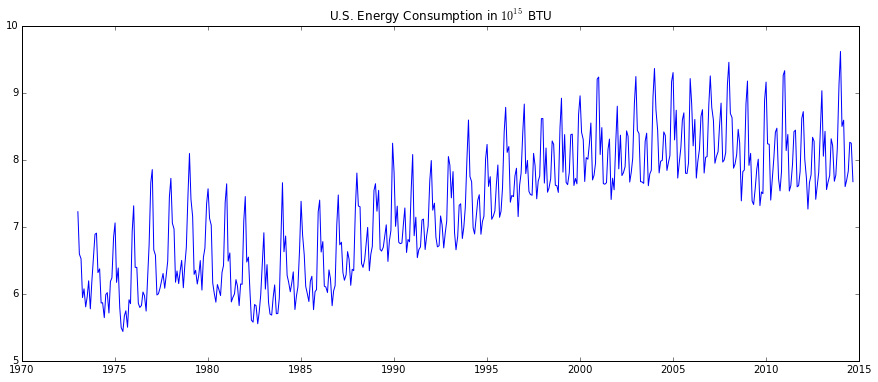

In [109]:
# Load the energy consumption data from online source.
import urllib.request

url  = urllib.request.urlopen("https://raw.githubusercontent.com/uiuc-cse/python-sp15/gh-pages/lessons/data/eia-data.csv").read(20000).decode('utf-8') # read only 20 000 chars
rows = url.split('\r') # then split it into lines
data_list = [row.split(',') for row in rows]
data_list = [float(pt) for row in data_list for pt in row ]
energy_data = np.array(data_list)
print(energy_data.shape[0])
energy_data = np.reshape(energy_data, (energy_data.shape[0]/2,2))

ax = plt.subplot(111)
ax.plot(energy_data[:,0], energy_data[:,1])
ax.set_title(r'U.S. Energy Consumption in $10^{15}$ BTU')
plt.show()

The data are a bit choppy to fit directly with a polynomial (although you could probably throw in a cyclical multiplier on an annual or semiannual period if you were interested in fitting the data that closely).  Let's sample periodically, which is easy in NumPy:

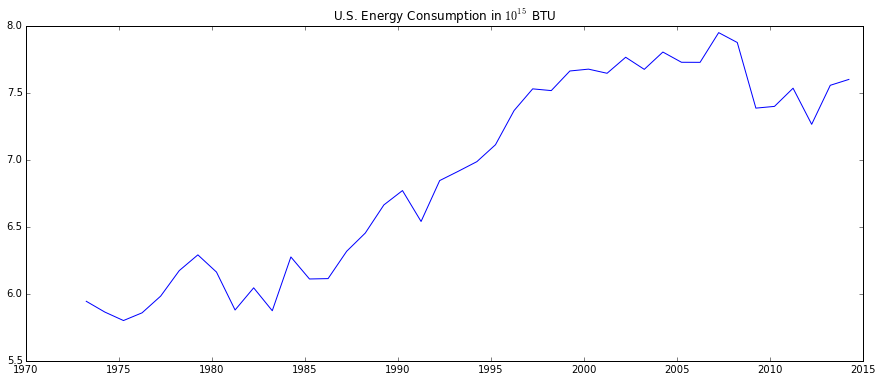

In [113]:
sample = energy_data[3::12] # sampling in March

ax = plt.subplot(111)
ax.plot(sample[:,0], sample[:,1])
ax.set_title(r'U.S. Energy Consumption in $10^{15}$ BTU')
plt.show()

Okay, now it's actually trivial to carry out a least-squares fit of the data to whatever polynomial degree they support:

In [117]:
from numpy.polynomial.polynomial import polyfit

order = 3

x = sample[:,0]
y = sample[:,1]

y_poly = polyfit(x, y, order)
y_fit = polyval(x, y_poly)

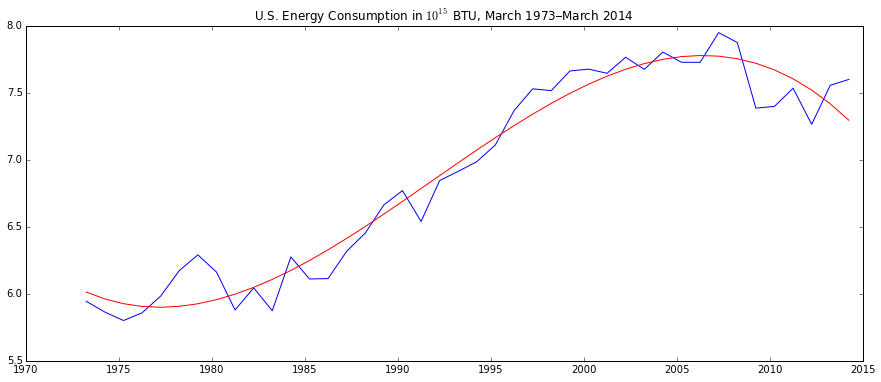

In [118]:
ax = plt.subplot(111)
ax.plot(x, y)
ax.plot(x, y_fit, 'r-')
ax.set_title(r'U.S. Energy Consumption in $10^{15}$ BTU, March 1973–March 2014')
plt.show()

The usual caveats about curve fitting, extrapolation, etc., of course apply.

You can also find out information about the residual and other statistics [as documented](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit):

In [119]:
y_poly, y_stats = polyfit(x, y, order, full=True)
y_fit = polyval(x, y_poly)

print(y_poly)
print(y_stats)

[  1.19661235e+06  -1.80248955e+03   9.05002880e-01  -1.51454653e-04]
[array([ 1.05993408]), 4, array([  1.99995382e+00,   1.35914505e-02,   3.30255017e-05,
         3.93448477e-08]), 9.3258734068513149e-15]


##### » <font color="FDB913">Basis functions</font>

The [Chebyshev functions](https://en.wikipedia.org/wiki/Chebyshev_polynomials) are a set of orthogonal basis functions used in the solution of differential equations.  They can be recursively defined as

$$T_0(x) = 1 $$
$$T_1(x) = x $$
$$T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x).$$

The first few functions are:

$$T_0(x) = 1$$

$$T_1(x) = x$$

$$T_2(x) = 2x^2 - 1$$

$$T_3(x) = 4x^3 - 3x$$

$$T_4(x) = 8x^4 - 8x^2 + 1$$

_et cetera_.

T_0(x) = poly([ 1.])
T_1(x) = poly([ 0.  1.])
T_2(x) = poly([-1.  0.  2.])
T_3(x) = poly([ 0. -3.  0.  4.])
T_4(x) = poly([ 1.  0. -8.  0.  8.])
T_5(x) = poly([  0.   5.   0. -20.   0.  16.])


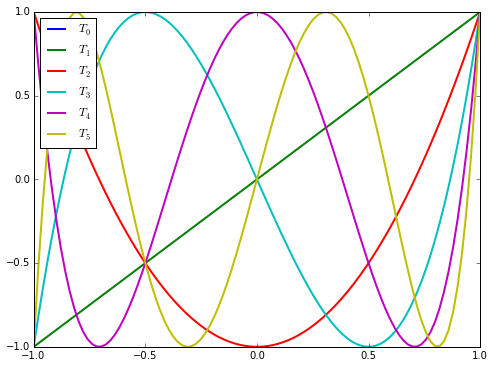

In [93]:
from numpy.polynomial import Chebyshev as T
from numpy.polynomial import Polynomial as P
x = np.linspace(-1, 1, 100)
for i in range(6):
    ax = plt.plot(x, T.basis(i)(x), lw=2, label=r'$T_%d$'%i)
    print(r'T_%d(x) = %s'%(i, T.basis(i).convert(kind=P)))
plt.legend(loc="upper left")
plt.show()

[Many other basis functions and standard polynomials](http://docs.scipy.org/doc/numpy/reference/routines.polynomials.classes.html) are available as well.

##### » <font color="FDB913">Taylor series expansions</font>

The functionality for creating Taylor series expansions of existing functions can be found several places in the SciPy suite.  For instance, `scipy.interpolate` provides [`approximate_taylor_polynomial`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.approximate_taylor_polynomial.html) to estimate the Taylor series around a point in an arbitrary function by polynomial fitting.

           3          2
0.0009125 x + 0.2097 x - 0.1374 x - 0.3801


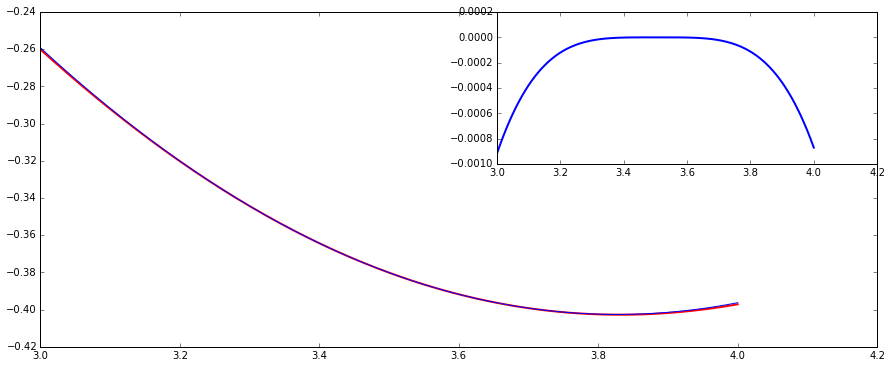

In [120]:
# Select an arbitrary function to approximate.
from scipy.special import j0 # Bessel function of the first kind, order zero

# Approximate the function f by the Taylor series expansion p (translated to the origin, so p(0) = f(x0)).
from scipy.interpolate import approximate_taylor_polynomial
x0 = 3.5 # location at which we will approximate
order = 3 # <-- tuning knob for order of approximation
series = approximate_taylor_polynomial(j0, x0, order, 0.01)
print(series)

# Plot the approximation(s) versus the original function.
x = np.linspace(x0-0.5, x0+0.5, 200)

mpl.rcParams['figure.figsize']=[15,6]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, j0(x), 'r-', lw=2, label=r'$J_0(x)$')
ax.plot(x, series(x-x0))

# Plot residual in subfigure.
ax = fig.add_subplot(222)
ax.plot(x, j0(x)-series(x-x0), lw=2)
plt.plot()
plt.show()

You can also utilize the `sympy.series` function:

In [96]:
from sympy import Symbol, series
from sympy.functions.special.bessel import besselj

x = Symbol('x')
series(besselj(0,x), x, x0=x0, n=order+1).evalf()

0.100693605780882 + 0.209689231045393*(x - 3.5)**2 + 0.00105676959875418*(x - 3.5)**3 - 0.137377527362327*x + O((x - 3.5)**4, (x, 3.5))

---
<a id='random'></a>
### Random Sampling

Random numbers are generated in [`numpy.random`](http://docs.scipy.org/doc/numpy/reference/routines.random.html) using a fairly sophisticated pseudorandom number generation algorithm, the [Mersenne Twister](http://en.wikipedia.org/wiki/Mersenne_twister) (incidentally, it's unsuitable for cryptography but acceptable for Monte Carlo simulations).

[_Dozens_](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState) of distributions are available for your use.  When you require a random value, you sample from a specific distribution with its own limits, weights, and moments:  uniform [0,1) (`uniform`), gaussian normal (`normal`), $\chi^{2}$ (`chisquare`), Pareto (`pareto`), and so on.

In [121]:
from numpy.random import random
print(random((2,3)))

[[ 0.97531059  0.1525748   0.37086162]
 [ 0.40833265  0.24213436  0.42117737]]


In [122]:
from numpy.random import uniform
print(uniform(0,1))
print(uniform(0,100))
print(uniform(5))

0.3829640723166391
92.1393770652476
2.4478890288731097


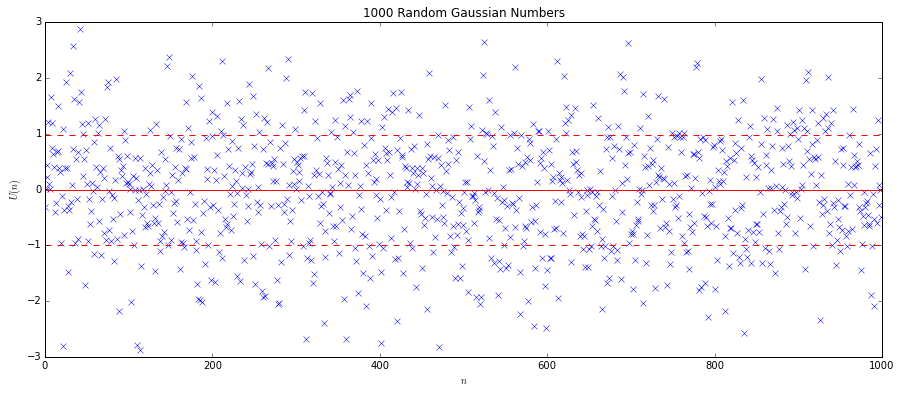

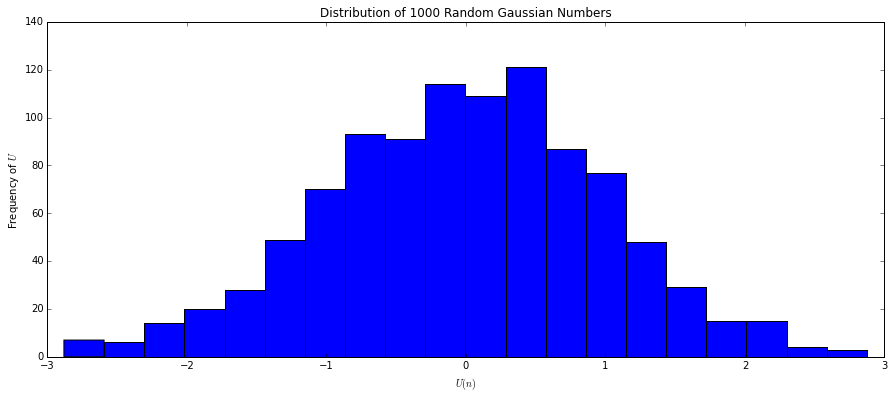

In [123]:
from numpy.random import normal

n = (1000,1)
x = normal(size=n)
avg = np.mean(x)
std = np.std(x)

x_avg  = np.ones(n)* avg
x_stdl = np.ones(n)*(avg-std)
x_stdh = np.ones(n)*(avg+std)

plt.plot(x,'bx',x_avg,'r-',x_stdl,'r--',x_stdh,'r--')
plt.title('%d Random Gaussian Numbers' % n[0]); plt.xlabel(r'$n$'); plt.ylabel(r'$U(n)$')
plt.show()

plt.hist(x,bins=20)
plt.title('Distribution of %d Random Gaussian Numbers' % n[0]); plt.xlabel(r'$U(n)$'); plt.ylabel(r'Frequency of $U$')
plt.show()

A _seed_ is necessary to start a PRNG.  Typically this is the system clock when the internal `RandomState` object is created, although you may provide a seed manually.  In this case, the random number sequence will be reproduced each time the program is invoked.   _This is particularly helpful when you are trying to create replicable results or debug your code._

##### » <font color="FDB913">Experimental Randomized Factorial Design</font>

A [_factorial experiment_](https://en.wikipedia.org/wiki/Factorial_experiment) tries all combinations or ordered pairs of experimental conditions.  It is a best practice to run these trials in a random order, thus attempting to minimize bias and environmental factors.

You can use the `shuffle` function to trivially generate a randomized factorial design for experimentation.  Consider a two-factor experiment where each independent variable can assume four states.  There are thus sixteen trials to be held:

In [124]:
# Generate an array of ordered pairs of independent variable values.
factors = np.array([[i, j] for i in range(0,4) for j in range(0,4)])
print('Initial array:\n', factors)

# Assign a random number to each ordered pair and sort on that basis.  Presto!  A randomized factorial design!
from numpy.random import shuffle
shuffle(factors)
print('Shuffled array:\n', factors)

Initial array:
 [[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]
Shuffled array:
 [[2 2]
 [1 3]
 [0 0]
 [1 2]
 [2 0]
 [3 0]
 [0 1]
 [3 1]
 [0 3]
 [2 1]
 [1 1]
 [3 2]
 [2 3]
 [0 2]
 [1 0]
 [3 3]]


---
<a id='scipy'></a>
## Scientific Python

[SciPy](http://scipy.org/) is a collection of mathematical routines built on top of NumPy.  SciPy also provides convenience functions for scientific computing.  (SciPy can refer to either the entire system of modules around NumPy or specifically to the SciPy library; we consistently take the latter sense in this document.)

You can get help for a component of `scipy` using the `info` function.  Similarly, `source` will let you view the source code for a function.

In [125]:
from scipy.special import jn
sp.info(jn)

jv(x1, x2[, out])

jv(v, z)

Bessel function of the first kind of real order v


In [126]:
from scipy import optimize
sp.source(optimize.fmin)

In file: /Users/rstein/anaconda/lib/python3.4/site-packages/scipy/optimize/optimize.py

def fmin(func, x0, args=(), xtol=1e-4, ftol=1e-4, maxiter=None, maxfun=None,
         full_output=0, disp=1, retall=0, callback=None):
    """
    Minimize a function using the downhill simplex algorithm.

    This algorithm only uses function values, not derivatives or second
    derivatives.

    Parameters
    ----------
    func : callable func(x,*args)
        The objective function to be minimized.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to func, i.e. ``f(x,*args)``.
    callback : callable, optional
        Called after each iteration, as callback(xk), where xk is the
        current parameter vector.
    xtol : float, optional
        Relative error in xopt acceptable for convergence.
    ftol : number, optional
        Relative error in func(xopt) acceptable for convergence.
    maxiter : int, optional
        Maximum number of itera

---
<a id='const'></a>
### Special Constants

[`scipy.constants`](http://docs.scipy.org/doc/scipy/reference/constants.html) provides mathematical constants and physical constants in SI units (unless otherwise stated).  It also provides primitive unit conversion support.

[`scipy.constants.physical_constants`](http://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants.physical_constants) is a dictionary of named quantities in the format `physical_constants[name] = (value, unit, uncertainty)`.

In [103]:
from scipy import constants
from math import e as ee

print(constants.R) #molar gas constant in J/mol/K
print(constants.physical_constants['molar gas constant'])

8.3144621
(8.3144621, 'J mol^-1 K^-1', 7.5e-06)


In [104]:
print(constants.c)
print(constants.physical_constants['speed of light in vacuum'])

299792458.0
(299792458.0, 'm s^-1', 0.0)


In [105]:
print(constants.physical_constants['neutron mass'])
print(constants.physical_constants['{220} lattice spacing of silicon'])
print(constants.physical_constants['Planck mass energy equivalent in GeV'])

(1.674927351e-27, 'kg', 7.4e-35)
(1.920155714e-10, 'm', 3.2e-18)
(1.220932e+19, 'GeV', 730000000000000.0)


In [106]:
print(constants.femto*constants.gram) #SI equivalent of fg (i.e., in kg)

1e-18


- How many seconds does it take a sound wave to traverse 1,000 miles?

In [107]:
#(1,000 miles to m) / (speed of sound at 15°C, 1 atm in m/s)
1000 * constants.mile / constants.mach

4726.414096916299

Make sure you know what you are asking for.

In [108]:
print(ee) #Euler's number, base of the natural logarithm
print(constants.e) #elementary charge, not Euler's number

2.718281828459045
1.602176565e-19


---
<a id='intdiff'></a>
### Integrals & Differential Equations
#### Numerical integration

A number of strategies exist for integrating raw numerical data and known functions.  We will use the following Bessel function as an illustration.

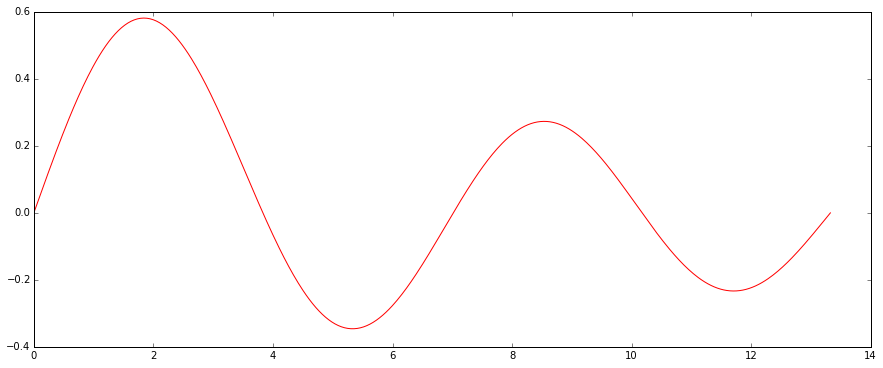

In [127]:
from scipy.special import jn, jn_zeros
xlo = 0.0
xhi = jn_zeros(1,4)[3]
x = np.linspace(xlo, xhi, 501)
y = jn(1, x)
plt.plot(x, y, 'r-')
plt.show()

Some integration functions require numerical data.

In [128]:
from scipy.integrate import trapz
val = trapz(x, y)
print('The result of the trapezoid rule is %f.'%val)

The result of the trapezoid rule is -0.781624.


In [129]:
from scipy.integrate import simps
val = simps(x, y)
print('The result of Simpson\'s rule is %f.'%val)

The result of Simpson's rule is -0.781642.


Others can operate directly on functions and yield error estimates as well.  `quad` is the recommended integrator for general-purpose ODEs.

In [130]:
from scipy.integrate import quadrature
(val, err) = quadrature(lambda x: jn(1, x), xlo, xhi)
print('The result of quadrature is %f with an error of %e.'%(val, err))

The result of quadrature is 0.781641 with an error of 5.664712e-09.


In [131]:
from scipy.integrate import quad
(val, err) = quad(lambda x: jn(1, x), xlo, xhi)
print('The result of general integration is %f with an error of %e.'%(val, err))

The result of general integration is 0.781641 with an error of 6.556892e-10.


You can also integrate the convenience classes provided in `numpy.polynomial`.  These results are analytic.

The base polynomial coefficients are [0.667, 4.675, -2.349, 5.602]
The integrated polynomial coefficients are [ 0.      0.667   2.3375 -0.783   1.4005]


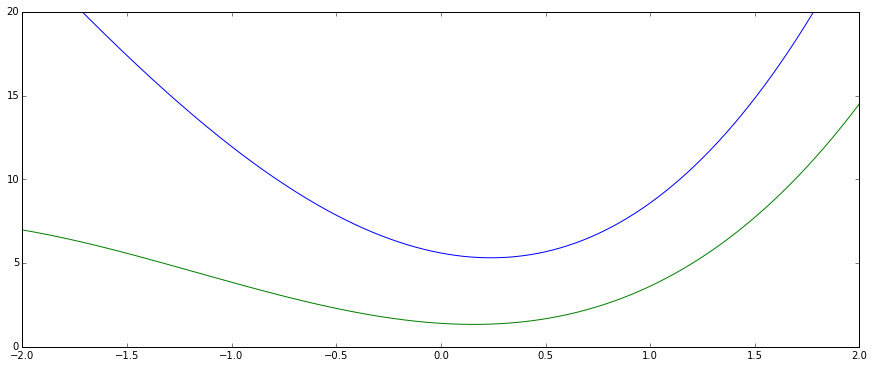

In [132]:
#from numpy.polynomial import Polynomial as P
from numpy.polynomial.polynomial import polyint
c = [0.667, 4.675, -2.349, 5.602]
print('The base polynomial coefficients are', c)
print('The integrated polynomial coefficients are', polyint(c))

x = np.linspace(-2, 2, 1001)
plt.plot(x, np.polyval(c, x))
plt.plot(x, np.polyval(polyint(c), x))
plt.ylim((0, 20))
plt.show()

#### Ordinary Differential Equations

`odeint` provides an interface for the solution of first-order differential equations.

##### » <font color="FDB913">First-order linear ODE</font>

Solve the equation $\left( 1 + x^2 \right) \textrm{d}y = \left( \frac{1}{x} - x y \right) \textrm{d}x$.

Rewrite in a canonical form as follows:

$\frac{\textrm{d}y}{\textrm{d}x} = \frac{\left( \frac{1}{x} - x y \right)}{1 + x^2} = \frac{1}{x + x^3} - \frac{x}{1 + x^2} y$.

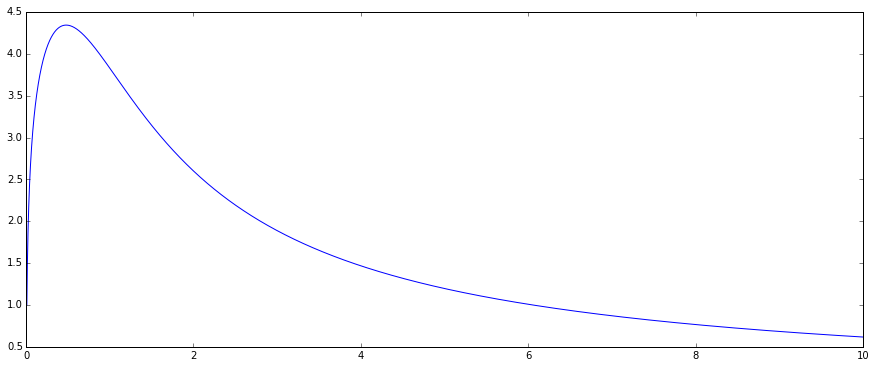

In [133]:
from scipy.integrate import odeint

def dydx(y, x):
    if x == 0:
        return float('Inf')
    return (1/(x+x**3.0)) - x/(1+x*x)*y

y0 = np.array((1.0))
dx = 1e-5
x  = np.arange(1e-2, 10.0, dx)
sol= odeint(dydx, y0, x)
plt.plot(x, sol)
plt.show()

##### » <font color="FDB913">First-order nonlinear ODE</font>

Solve the equation $\frac{\textrm{d}y}{\textrm{d}x} = y(x)^2$ subject to the condition $y(0) = A$ for $A \in \left\{0.2, 0.4, ..., 2.0\right\}$ over the range $x \in \left[0, \frac{1}{2}\right]$.

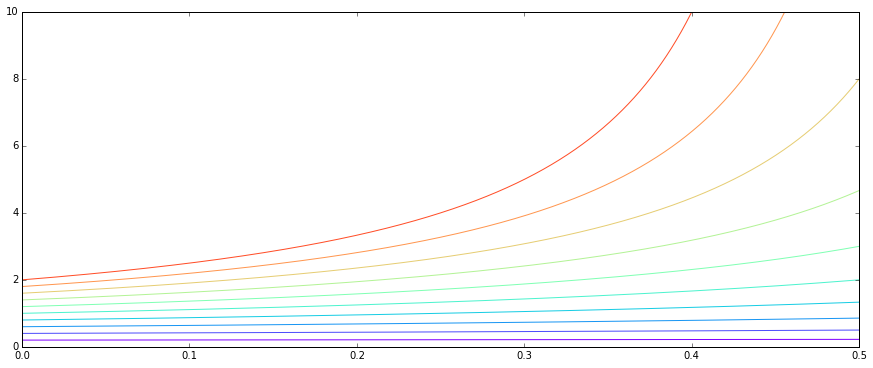

In [134]:
def dydx(y, x):
    return y*y

y0 = np.arange(0.2,2.01,0.2)
x  = np.arange(0.0, 0.5, 1e-5)
sol= odeint(dydx, y0, x)

import matplotlib.cm as cm
for i in np.arange(10):
    c = cm.rainbow(i/10.,1)
    plt.plot(x[:], sol[:,i], color=c)
plt.ylim((0,10))
plt.show()

##### » <font color="FDB913">Second-order linear ODE</font>

Higher-order ODEs may be solved by the expedient of using a system of coupled DEs thus:

$$\frac{du}{dt} = v$$

$$\frac{dv}{dt} = f(u, v)$$

Boundary conditions must be handled using the [shooting method](http://en.wikipedia.org/wiki/Shooting_method), as only one boundary condition can be specified at a time with the current `odeint` function.

Solve the 1D steady-state heat equation $g(x) = \alpha \left( \frac{\partial^2 u}{\partial x^2} \right)$ with $\alpha = 1$ and the boundary conditions $u(x = 0) = 0$, $u(x = 1) = 1$ over the range $x \in [0, 1]$ with $g(x) = -sin(x)$.

Rewrite the equation as a system of two first-order equations:

<div align="center">$\frac{\partial u}{\partial x} = v(x)$</div>

<div align="center">$\frac{\partial v}{\partial x} = -20 \sin(x)$</div>

In this case (linear equation), given two trial solutions $u_1$ and $u_2$ meeting only the left-hand boundary condition $u(0)$, we can write the actual solution as a linear combination of these two solutions.  The coefficients are:

<div align="center">$c_1 = \frac{u(1) - u_1(1)}{u_1(1) - u_2(1)}$</div>

<div align="center">$c_2 = \frac{u_2(1) - u(1)}{u_1(1) - u_2(1)}$</div>

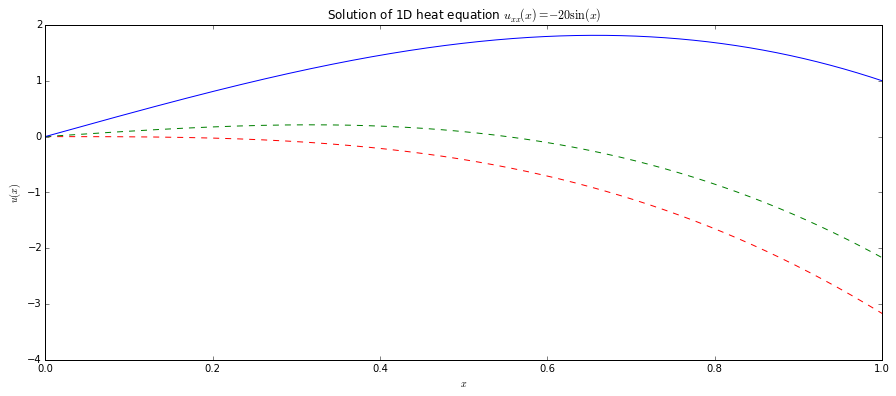

In [136]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
#f = [u, v]
def dfdx(f, x):
    return np.array([f[1], -20*np.sin(x)])

f1 = odeint(dfdx, np.array([0.0, 0.0]), np.linspace(0.0, 1.0, 10000))
f2 = odeint(dfdx, np.array([0.0, 1.0]), np.linspace(0.0, 1.0, 10000))
#Shooting method for converting a BVP to an IVP.
c1 = (1.0 - f2[:,0][-1]) / (f1[:,0][-1] - f2[:,0][-1])
c2 = (f1[:,0][-1] - 1.0) / (f1[:,0][-1] - f2[:,0][-1])
f = c1 * f1[:,0] + c2 * f2[:,0]

plt.plot(np.linspace(0.0, 1.0, 10000), f1[:,0], 'r--',
         np.linspace(0.0, 1.0, 10000), f2[:,0], 'g--',
         np.linspace(0.0, 1.0, 10000), f, 'b-')
plt.title(r'Solution of 1D heat equation $u_{xx}(x) = -20 \sin(x)$')
plt.ylabel(r'$u(x)$')
plt.xlabel(r'$x$')
plt.ylim((-4,2))
plt.show()

---
<a id='interp'></a>
### Data Interpolation

[`scipy.interpolate`](http://docs.scipy.org/doc/scipy/reference/interpolate.html) provides splines, polynomial interpolators, and other resources for univariate and multivariate interpolation.

[`interp1d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) returns a function interpolating data within the range of the data.

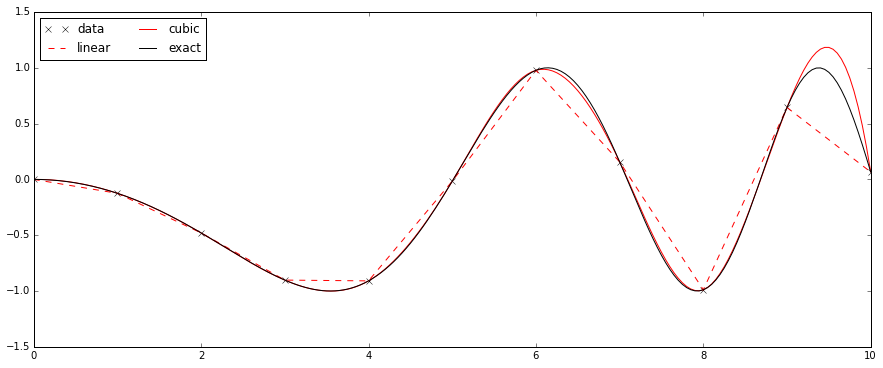

f(2.718280) = -0.783145


In [137]:
from scipy.interpolate import interp1d

xpts = np.linspace(0, 10, 11)
y = np.sin(-xpts**2/8.0)

f = interp1d(xpts, y, kind='linear')
f2 = interp1d(xpts, y, kind='cubic')

x = np.linspace(0, 10, 201)
plt.plot(xpts, y, 'kx',
         x, f(x), 'r--',
         x, f2(x), 'r-',
         x, np.sin(-x**2/8.0), 'k-')
plt.legend(['data', 'linear', 'cubic', 'exact'], loc='upper left', ncol=2)
plt.ylim((-1.5,1.5))
plt.show()

print('f(%f) = %f'%(2.71828, f(2.71828)))

[`griddata`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata) interpolates unstructured $N$-dimensional data according to one of several methods (nearest, linear, and cubic).

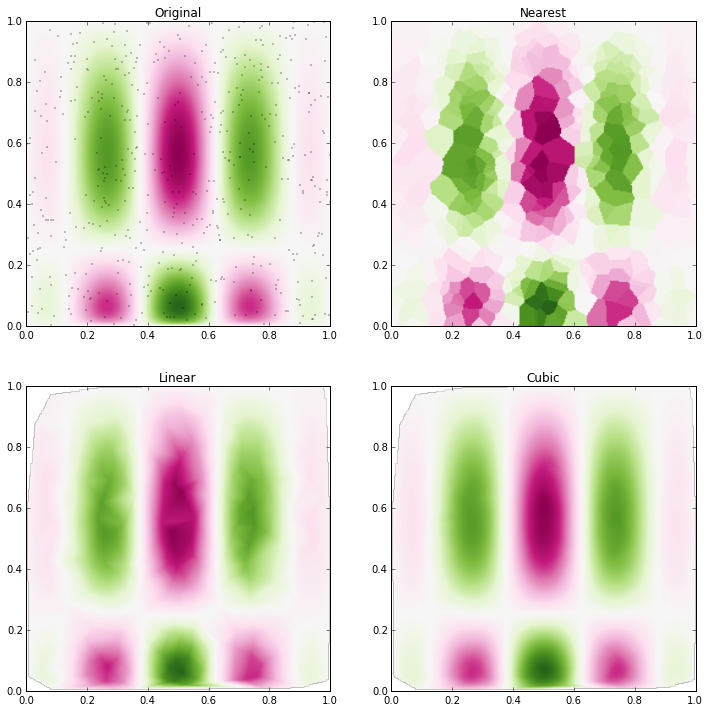

In [138]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(2*np.pi*np.sqrt(y))

# Define the basic grid coordinates.
grid_x, grid_y = np.mgrid[0:1:250j, 0:1:250j]

# Define a random subset of the grid for which we will generate data.
pts = np.random.rand(500,2)
vals = func(pts[:,0], pts[:,1])

# Load the methods and generate a grid for each approach.
from scipy.interpolate import griddata
grid_z0 = griddata(pts, vals, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(pts, vals, (grid_x, grid_y), method='linear')
grid_z2 = griddata(pts, vals, (grid_x, grid_y), method='cubic')

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.plot(pts[:,0], pts[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower', cmap=cm.PiYG)
plt.title('Cubic')

plt.gcf().set_size_inches(12, 12)
plt.show()

Spline interpolations in one and two dimensions are also available.

---
<a id='opt'></a>
### Optimization

As an example, we will optimize over the function $\sqrt[x]x$, which has a global maximum at $x = e = 2.718281828459045...$.  This gives us a straightforward benchmark of testing for convergence and accuracy.

/Users/rstein/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


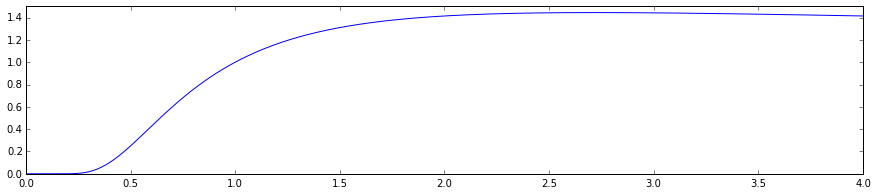

In [142]:
from math import e as ee
def f(x):
    return x ** (1/x)
x = np.linspace(0,4,401)
y = f(x)
mpl.rcParams['figure.figsize']=[15,3]
plt.plot(x, y, 'b-')
plt.axis((0.0, 4.0, 0.0, 1.5))
plt.show()

The only wrinkly is that SciPy only provides a [`minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function, so we have to subtly modify this to work properly.

Optimization terminated successfully.
         Current function value: -0.444668
         Iterations: 32
         Function evaluations: 67
 success: True
     nit: 32
  status: 0
 message: 'Optimization terminated successfully.'
    nfev: 67
     fun: -0.44466786100976607
       x: array([ 2.71828184])
Absolute error is 1.281903e-08.


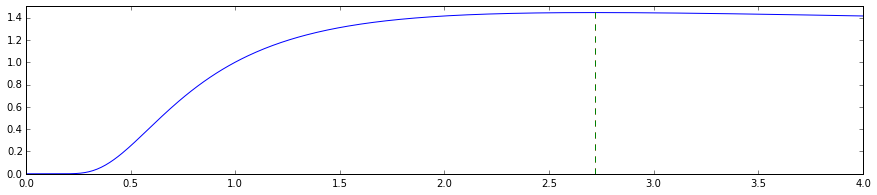

In [143]:
from scipy.optimize import minimize
def fmod(x):
    return 1.0-f(x)
x0 = 1.0 #a bad guess

res = minimize(fmod, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print(res)
print('Absolute error is %e.'%(res.x-ee))
mpl.rcParams['figure.figsize']=[15,3]
plt.plot(x, y, 'b-', [ee, ee], [0.0, 1.5], 'r--', [res.x, res.x], [0.0, 1.5], 'g--')
plt.axis((0.0, 4.0, 0.0, 1.5))
plt.show()

There is a [wide selection of optimization methods](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) available in SciPy, from old standbys like the [Nelder–Mead simplex](http://mathworld.wolfram.com/Nelder-MeadMethod.html) and [conjugate gradient](http://mathworld.wolfram.com/ConjugateGradientMethod.html) to [simulated annealing](http://mathworld.wolfram.com/SimulatedAnnealing.html) and the [dog-leg trust-region](http://www.numerical.rl.ac.uk/people/nimg/course/lectures/raphael/lectures/lec7slides.pdf) algorithm.

---
<a id='interp'></a>
### Special Functions

Special functions typically refer to particular mathematical functions with well-established notations and roles, although there is no formal definition of the category.

Some common special functions include the relatively common trigonometric ($\sin, \cos, \tan, \sinh, \cosh, \tanh$) (which are in the `scipy` namespace), Bessel ($J_\nu, Y_\nu, I_\nu, K_\nu$), Airy ($\textrm{Ai}$), spherical harmonics ($Y^m_\ell$), $\Gamma$, binomial coefficient, and error ($\textrm{erf}, \textrm{erfc}$) functions.  Many more esoteric functions, such as Kelvin ($\textrm{ber}, \textrm{bei}, \textrm{ker}, \textrm{kei},$ etc.), Mathieu ($\textrm{CE}_n, \textrm{SE}_n$, etc.), and [hypergeometric functions](https://en.wikipedia.org/wiki/Generalized_hypergeometric_function) ($_pF_q, \textrm{Li}_2$, etc.) are also supported in [`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html).

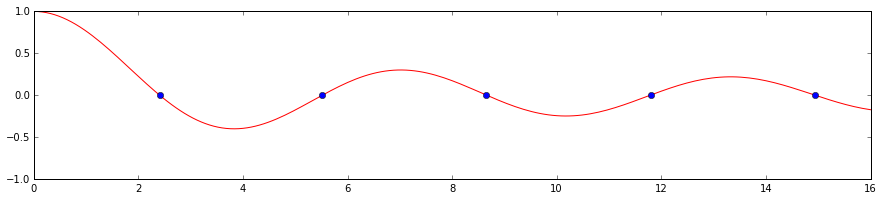

In [144]:
from scipy.special import j0, jn_zeros
x = np.linspace(0, 16, 201)
plt.plot(x, j0(x), 'r-', jn_zeros(0, 5), [0]*5, 'bo')
plt.ylim((-1.0, 1.0))
plt.show()

In [ ]:
from scipy.special import airy
(Ai, Aip, Bi, Bip) = airy(1.0)
print('Ai(1.0) = %.4f\nBi(1.0) = %.4f'%(Ai, Bi))

In [ ]:
from scipy.special import erf, gamma, eval_legendre
x = np.linspace(0.001, 3, 201)
plt.plot(x, erf(x), 'r-',
         x, gamma(x), 'g-',
         x, eval_legendre(8, x), 'b-')
plt.ylim((-0.5, 2.5))
plt.show()

There are both generic and optimized specific versions of many of these functions, particularly Bessel and Hankel functions.

In [ ]:
from scipy.special import jn, jv, j0

print('j0(1.5) = %s\n'%j0(1.5))

# Let's do some time trials to see which is faster.  (This is for 1e6 evaluations, not one.)
import timeit
t = timeit.Timer("jv(0, 1.5)","from scipy.special import jv")
print('jv(0, 1.5) @ %.4s s'%t.timeit())

t = timeit.Timer("jn(0, 1.5)","from scipy.special import jn")
print('jn(0, 1.5) @ %.4s s'%t.timeit())

t = timeit.Timer("j0(1.5)","from scipy.special import j0")
print('j0(1.5) @ %.4s s'%t.timeit())

---
<a id='stat'></a>
### Basic Statistics

[`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html) contains many probability distributions and associated convenience functions and statistical functions.

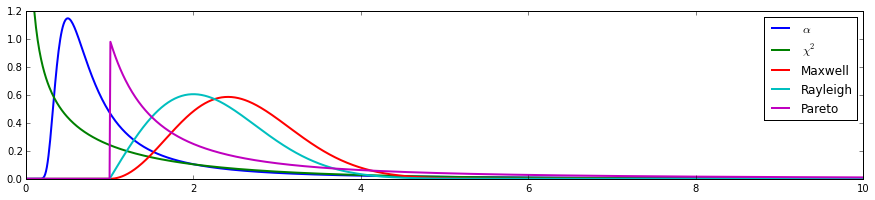

In [145]:
from scipy.stats import alpha, chi2, maxwell, rayleigh, pareto
x = np.linspace(0.01, 10, 1001)
ax = plt.plot(x, alpha.pdf(x, 1.0), lw=2, label=r'$\alpha$')
ax = plt.plot(x, chi2.pdf(x, 1.0), lw=2, label=r'$\chi^2$')
ax = plt.plot(x, maxwell.pdf(x, 1.0), lw=2, label=r'Maxwell')
ax = plt.plot(x, rayleigh.pdf(x, 1.0), lw=2, label=r'Rayleigh')
ax = plt.plot(x, pareto.pdf(x, 1.0), lw=2, label=r'Pareto')

plt.legend(loc='upper right')
plt.ylim(0.0, 1.2)
plt.show()

x_mean =
 0.0216240026127
x_tmean =
 -0.0049164460434
is skew significant?  the p-value is [ 0.22327173]
histogram bins size = 1.552326, low value = -3.899678, occupancy = [   6.  207.  552.  222.   13.]


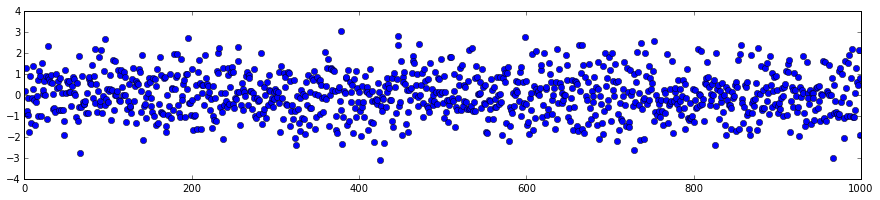

In [147]:
from numpy.random import normal
n = (1000,1)
x = normal(size=n)
plt.plot(x, 'bo')

from scipy.stats import tmean, skewtest, histogram
x_mean = np.mean(x)
x_tmean= tmean(x, (-1, 1)) #trimmed mean:  mean of interval [-1, 1]

print('x_mean =\n', x_mean)
print('x_tmean =\n', x_tmean)
print('is skew significant?  the p-value is', skewtest(x)[1])

h = histogram(x, 5)
print('histogram bins size = %f, low value = %f, occupancy = %s'%(h[2], h[1], h[0]))

---
<a id='int-ex'></a>
## Integrated Examples

<a id='fdhe'></a>
##### » <font color="FDB913">Finite-difference heat equation</font>

Finite-difference models are used throughout engineering to obtain numerical solutions to differential equations.  This particular system models the heat equation

$$ \frac{1}{\alpha} \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$

given an initial condition of $u(x,t=0) = \sin\left(\pi x/L\right)$ and boundary conditions of $u(x=0,t) = 0$ and $u(x=L,t) = 0$.

To approximate a derivative, the most straightforward way is to take the formal definition

$$f'(x) = \frac{f(x+h)-f(x)}{h}$$

and use a small but nonzero step $h$ in your calculation.

Application of this principle to the heat equation leads to a statement of the form

$$ \frac{1}{\alpha} \frac{u^m_i - u^{m-1}_i}{\Delta t} = \frac{u^{m-1}_{i-1} - 2 u^{m-1}_{i} + u^{m-1}_{i+1}}{\Delta x^2} $$

or $u^m_i = \frac{\alpha \Delta t}{\Delta x^2}u^{m-1}_{i-1} + \left[1 - 2\left(\frac{\alpha \Delta t}{\Delta x^2}\right)\right]u^{m-1}_{i} + \frac{\alpha \Delta t}{\Delta x^2}u^{m-1}_{i+1}$.

This clearly yields a way to calculate subsequent time steps point-by-point from the previous time step's data.

##### Pure Python Version

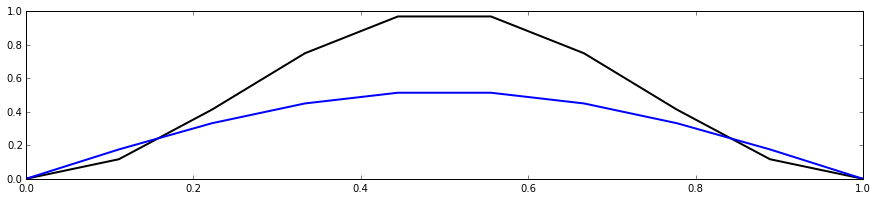

In [148]:
# Basic parameters
nt = 60
nx = 10
alpha = 0.1 
length = 1.0 
tmax = 0.5

# Derived parameters:  mesh spacing and time step size
dx = length / (nx-1)
dt = tmax / (nt-1)

# Create arrays to save data in process.
x = []
t = []
u = []
for i in range(nt):
    t.append(i*dt)
    ulist = []
    for j in range(nx):
        ulist.append(0.0)
    u.append(ulist)
for i in range(nx):
    x.append(i*dx)

# Set initial and boundary conditions.
from math import sin, pi
for j in range(nx):
    u[0][j] = sin(pi*(j*dx)/length)**2
#boundaries are implicitly set by this initial condition

# Loop through each time step.
r  = alpha * dt / (dx*dx)
s  = 1 - 2*r
for n in range(1, nt):
    for j in range(1, nx-1):
        u[n][j] = r*u[n-1][j-1] + s*u[n-1][j] + r*u[n-1][j+1]

# Plot the results (initial and final conditions).
mpl.rcParams['figure.figsize']=[15,3]
plt.plot(x, u[0], 'k-', lw=2)
plt.plot(x, u[-1],  'b-', lw=2)

plt.ylim((0,1))
plt.xlim((0,1))
plt.show()

##### NumPy Version #1

So the code above basically works, but we can make a few improvements by moving to NumPy for more of it.

First, let's read in the parameters from a separate file.  (There's also a version in `coding.ipynb` which uses the command line arguments as input.)  We'll also start using NumPy `ndarray`s for the data, which simplifies things a lot.

In [149]:
# Load parameters from disk.
with open('fd-params.cfg', 'r') as config:
    for line in config:
        variable, value = [word.strip() for word in line.split('=')]
        exec(variable + '=' + value)

# Compute mesh spacing and time step.
dx = length / (nx-1)
dt = tmax / (nt-1)

# Create arrays to save data in process.
x = np.linspace(0, length+1e-15, nx)
t = np.linspace(0, tmax+1e-15, nt)
u = np.zeros([nx, nt])

# Set initial and boundary conditions.
u[:, 0] = np.sin(np.pi*x/length)**2
#boundaries are implicitly set by this initial condition

# Loop through each time step.
r  = alpha * dt / (dx*dx)
s  = 1 - 2*r
for n in range(1, nt):
    for j in range(1, nx-1):
        u[j, n] = r*u[j-1, n-1] + s*u[j, n-1] + r*u[j+1, n-1]

# Plot the results (initial and final conditions).
mpl.rcParams['figure.figsize']=[15,3]
plt.plot(x, u[:,0], 'k-', lw=2)
plt.plot(x, u[:,-1],  'b-', lw=2)

plt.ylim((0,1))
plt.xlim((0,1))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'fd-params.cfg'

##### NumPy Version #2

Now we can try to convert the calculation to use a matrix instead of a step-by-step `for` loop.  We also use a few functions to ease things out.

In [ ]:
def calc_params(nx, nt, alpha, length, tmax):
    # Compute mesh spacing and time step.
    dx = length / (nx-1)
    dt = tmax / (nt-1)
    return (dx, dt)

def create_arrays(nx, nt):
    # Create arrays to save data in process.
    x = np.linspace(0, length+1e-15, nx)
    t = np.linspace(0, tmax+1e-15, nt)
    u = np.zeros([nx, nt])
    return (x, t, u)

def set_ic(x, length):
    # Set initial and boundary conditions.
    u[:, 0] = np.sin(np.pi*x/length)**2
    #boundaries are implicitly set by this initial condition
    return u

def plot_results(u, x):
    # Plot the results (initial and final conditions).
    mpl.rcParams['figure.figsize']=[15,3]
    plt.plot(x, u[:,0], 'k-', lw=2)
    plt.plot(x, u[:,-1],  'b-', lw=2)
    
    #import matplotlib.cm as cm
    #for i in range(len(u[:,0:-1:10])-1):
    #    c = cm.rainbow(i/len(u[:,0:-1:10]), 1)
    #    plt.plot(x[:], u[:,i], color=c, lw=2)
    
    plt.ylim((0,1))
    plt.xlim((0,1))
    plt.show()

def gen_matrix(nx, alpha, dt, dx):
    r  = alpha * dt / (dx*dx)
    s  = 1 - 2*r
    A = np.zeros((nx, nx), dtype=np.float128)
    i,j = np.indices(A.shape)
    A[i==j]   = s
    A[i==j-1] = r
    A[i==j+1] = r
    return A

# Load parameters from disk.
with open('fd-params.cfg', 'r') as config:
    for line in config:
        variable, value = [word.strip() for word in line.split('=')]
        exec(variable + '=' + value)

(dx, dt) = calc_params(nx, nt, alpha, length, tmax)
(x, t, u ) = create_arrays(nx, nt)
u = set_ic(x, length)
A = gen_matrix(nx, alpha, dt, dx)

# Loop through each time step.
for n in range(1, nt):
    u[:,n] = A.dot(u[:,n-1])

plot_results(u, x)

Now examine `heat_eqn_cl.py` to see how to read parameters off of the command line.

Another useful trick is to store parameters in a dictionary for easy lookup, rather than cluttering the namespace with dozens of variables.

You can see how inputting the parameters from a file can let you handle units automatically as well (_e.g._, `dx = 1e-4 m`).

<a id='mandel'></a>
##### » <font color="FDB913">Mandelbrot set (fractals)</font>

The Mandelbrot set is obtained by iteratively assigning a value to each point $c$ in the complex plane according to the formula $z_{n+1} = z_{n}^2 + c$ ($z_{0} = 0$).  If the value $z$ goes to $\infty$ as $n \rightarrow \infty$, then that point $c$ is _not_ part of the Mandelbrot set.  Conversely, if the value of $z$ remains bounded no matter how large $n$ becomes, the point $c$ is part of the Mandelbrot set.

From [Wikipedia](https://en.wikipedia.org/wiki/Mandelbrot_set), "Mandelbrot set images are made by sampling complex numbers and determining for each whether the result tends towards infinity when a particular mathematical operation is iterated on it.  Treating the real and imaginary parts of each number as image coordinates, pixels are colored according to how rapidly the sequence diverges, if at all."

The following code implements the _escape-time algorithm_, which tells you how many iterations until a point "escapes", or becomes unbounded, if it does so under a certain maximum limit.  This version does not utilize complex numbers, although a version could be written which does so.

##### Version #1

This version lumps everything into one function.

In [ ]:
def mandelbrot(minR, maxR, minI, maxI, samples=51, iters=25):
    """
    Generate the Mandelbrot set within the boundaries of the limits
    maxR, minR, minI, maxI with samples and a maximum iteration of iters.
    """
    # Generate a mesh for the set.
    setR = np.linspace(minR, maxR, samples)
    setI = np.linspace(minI, maxI, samples)

    # Calculate the values at each point of the mesh by the escape-time
    # fractal algorithm.
    pts = np.zeros([samples, samples])
    for ii in range(1, len(setR)):
        for jj in range(1, len(setI)):
            it = 0
            x = 0.0
            y = 0.0

            xx = setR[ii]
            yy = setI[jj]

            # Look for escape---i.e., does the value settle down in a few
            # iterations or does it keep going?
            while(x * x + y * y < 4 and it < iters):
                xtmp = x * x - y * y + xx
                y = 2 * x * y + yy
                x = xtmp
                it += 1
            pts[ii, jj] = it
    return setR, setI, pts

# Plot boundaries
minR = -2.25
maxR = 0.75
minI = -1.5
maxI = 1.5

samples = 201
iters = 20

x, y, z = mandelbrot(minR, maxR, minI, maxI, samples, iters)
z = z.transpose()

mpl.rcParams['figure.figsize']=[8,8]
plt.imshow(z, interpolation='nearest')
plt.show()

##### Version #2

Let's illustrate the use of a parameter dictionary and split up the functions a little better.  We'll also show better form and use the `__main__` check to see if this file is being `import`ed or executed.

The `mand_alg` function is a great candidate for parallelization as well since each point is independent of the others.

In [ ]:
def mand_mesh(params):
    """Generate a mesh for the Mandelbrot set calculation."""
    setR = np.linspace(params['r.min'], params['r.max'], params['samples'])
    setI = np.linspace(params['i.min'], params['i.max'], params['samples'])
    pts = np.zeros([params['samples'], params['samples']])
    return (setR, setI, pts)

def mand_escape(params, xx, yy):
    # Look for escape---i.e., does the value settle down in a few
    # iterations or does it keep going?
    x, y = 0.0, 0.0
    it = 0
    while(x * x + y * y < 4 and it < params['iter.max']):
        z_np1 = x * x - y * y + xx
        y = 2 * x * y + yy
        x = z_np1
        it += 1
    return it

def mand_alg(params):
    """
    Generate the Mandelbrot set within the boundaries of the limits
    r.max, r.min, i.min, i.max with samples and a maximum iteration of iter.max.
    (These are keys in params dictionary.)
    """
    # Calculate the values at each point of the mesh by the escape-time
    # fractal algorithm.
    setR, setI, pts = mand_mesh(params)
    
    for ii in range(1, params['samples']):
        for jj in range(1, params['samples']):
            xx = setR[ii]
            yy = setI[jj]
            pts[ii, jj] = mand_escape(params, xx, yy)
    return setR, setI, pts

def mand_plot(z):
    mpl.rcParams['figure.figsize']=[8,8]
    plt.imshow(z, interpolation='nearest')
    plt.show()

if __name__ == "__main__":
    params = dict()
    params['r.min'] = -2.25
    params['r.max'] =  0.75
    params['i.min'] = -1.50
    params['i.max'] =  1.50
    params['samples'] = 401
    params['iter.max']  = 20
    
    x, y, z = mand_alg(params)
    z = z.transpose()
    mand_plot(z)

---
<a id='refs'></a>
## References

- Langtangen, Hans Petter.  _Python Scripting for Computational Science_, 3ed.  Berlin–Heidelberg:  Springer–Verlag, 2009.
- Lugo, Michael.  [On propagation of errors](http://gottwurfelt.com/2012/03/26/on-propagation-of-errors/).  26 March 2012.
- Warren, Russell.  [A Brief Intro to Profiling in Python](https://speakerdeck.com/rwarren/a-brief-intro-to-profiling-in-python).  Ottawa Python Authors Group, 28 February 2013.

---
<a id='credits'></a>
## Credits

Neal Davis developed these materials for [Computational Science and Engineering](http://cse.illinois.edu/) at the University of Illinois at Urbana–Champaign.

<img src="http://i.creativecommons.org/l/by/3.0/88x31.png" align="left">
This content is available under a [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0/).

[![](https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6)](http://cse.illinois.edu/)